In [1]:
import sys
  
# append the path of the
# parent directory
sys.path.append("..")

import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import json, csv
import mne
import scipy
import pandas
import mbt_pyspt as mbt
from mbt_pyspt.models.eegdata import EEGData
from mbt_pyspt.models.mybraineegdata import MyBrainEEGData
from mbt_pyspt.modules.preprocessingflow import PreprocessingFlow
from utils.em_data_loader import generate_participants_datasets, generate_participants_events, load_dataset
from utils.em_plotting import plot_annotations, plot_study, plot_signal
from preprocessing.em_preprocessing import compute_asr_reconstruction
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from pprint import pprint
from meegkit.asr import ASR
from meegkit.utils.matrix import sliding_window

print("All libraries successfully loaded!")

All libraries successfully loaded!


In [2]:
# Prepare all the datasets
path_eo_ec = '../data/em_ca_experiment_slim/1EOEC'
path_ec_eo = '../data/em_ca_experiment_slim/2ECEO'
excluded = ['s050702', 's020702', 's060702', 's250603', 's220603', 's220604' 's170603', 's050703', 's050705']
eo_ec_folders = []
ec_eo_folders = []
eeg_folder = 'eeg_raw'
metadata_folder = 'metadata'
physio_folder = 'physio_raw'

for directory in os.listdir(path_eo_ec):
    if directory != 'excluded':
        eo_ec_folders.append(directory)
for directory in os.listdir(path_ec_eo):
    if directory != 'excluded':
        ec_eo_folders.append(directory)

generate_participants_datasets(path_eo_ec, eo_ec_folders, '1EOEC')
generate_participants_datasets(path_ec_eo, ec_eo_folders, '2ECEO')

print("All datasets prepared")

Processing participant s010701
s010701 ...loaded!
s010701 ...generated events!
s010701 ...split data part 1!
s010701 ...split data part 2!
s010701...merged all the data and saved in ../data/em_ca_experiment_slim/1EOEC/s010701/s010701_prepared.json !
Processing participant s010704
s010704 ...loaded!
s010704 ...generated events!
s010704 ...split data part 1!
s010704 ...split data part 2!
s010704...merged all the data and saved in ../data/em_ca_experiment_slim/1EOEC/s010704/s010704_prepared.json !
Processing participant s020701
s020701 ...loaded!
s020701 ...generated events!
s020701 ...split data part 1!
s020701 ...split data part 2!
s020701...merged all the data and saved in ../data/em_ca_experiment_slim/1EOEC/s020701/s020701_prepared.json !
Processing participant s020702
s020702 ...loaded!
s020702 ...generated events!
s020702 ...split data part 1!
s020702 ...split data part 2!
s020702...merged all the data and saved in ../data/em_ca_experiment_slim/1EOEC/s020702/s020702_prepared.json !


s280601 ...loaded!
s280601 ...generated events!
s280601 ...split data part 1!
s280601 ...split data part 2!
s280601...merged all the data and saved in ../data/em_ca_experiment_slim/2ECEO/s280601/s280601_prepared.json !
Processing participant s290601
s290601 ...loaded!
s290601 ...generated events!
s290601 ...split data part 1!
s290601 ...split data part 2!
s290601...merged all the data and saved in ../data/em_ca_experiment_slim/2ECEO/s290601/s290601_prepared.json !
Processing participant s290603
s290603 ...loaded!
s290603 ...generated events!
s290603 ...split data part 1!
s290603 ...split data part 2!
s290603...merged all the data and saved in ../data/em_ca_experiment_slim/2ECEO/s290603/s290603_prepared.json !
Processing participant s290605
s290605 ...loaded!
s290605 ...generated events!
s290605 ...split data part 1!
s290605 ...split data part 2!
s290605...merged all the data and saved in ../data/em_ca_experiment_slim/2ECEO/s290605/s290605_prepared.json !
Processing participant s300604


In [2]:
# Load the entire Emotion-Music dataset
dataset = load_dataset()
print(dataset.keys())

dict_keys(['s010701', 's010702', 's010703', 's010704', 's020701', 's020702', 's020703', 's020704', 's050701', 's050702', 's050704', 's060703', 's070701', 's070702', 's170601', 's210602', 's220602', 's230602', 's230603', 's230604', 's240601', 's240602', 's240604', 's250601', 's250602', 's250604', 's260601', 's260602', 's280601', 's280603', 's280604', 's290601', 's290602', 's290603', 's290604', 's290605', 's300602', 's300604'])


In [9]:
for participant_id in dataset:
    data = dataset[participant_id]
    channel_data = data['trials']['EO/class_1_A']['eeg']
    print(participant_id)
    print(len(data['trials']['EO/class_4_B']['annotations']['x'])/ 60)
    sampling_rate = data['sampRate']
    channel_locations = data['acquisitionLocation']
    raw = EEGData(channel_data, sampling_rate, channel_locations)
    list_pp = [('remove_dc_sec_by_sec', None), ('notch_filter', {"freqs": 50})]
    ppflow = PreprocessingFlow(eeg_data=raw, preprocessing_list=list_pp)


s010701
45.71666666666667 45.71666666666667
Creating RawArray with float64 data, n_channels=2, n_times=15000
    Range : 0 ... 14999 =      0.000 ...    59.996 secs
Ready.
Creating RawArray with float64 data, n_channels=2, n_times=15000
    Range : 0 ... 14999 =      0.000 ...    59.996 secs
Ready.
s010702
46.75 46.75
Creating RawArray with float64 data, n_channels=2, n_times=15000
    Range : 0 ... 14999 =      0.000 ...    59.996 secs
Ready.
Creating RawArray with float64 data, n_channels=2, n_times=15000
    Range : 0 ... 14999 =      0.000 ...    59.996 secs
Ready.
s010703
46.7 46.7
Creating RawArray with float64 data, n_channels=2, n_times=15000
    Range : 0 ... 14999 =      0.000 ...    59.996 secs
Ready.
Creating RawArray with float64 data, n_channels=2, n_times=15000
    Range : 0 ... 14999 =      0.000 ...    59.996 secs
Ready.
s010704
45.75 45.75
Creating RawArray with float64 data, n_channels=2, n_times=15000
    Range : 0 ... 14999 =      0.000 ...    59.996 secs
Ready.
Cr

Ready.
Creating RawArray with float64 data, n_channels=2, n_times=15000
    Range : 0 ... 14999 =      0.000 ...    59.996 secs
Ready.
s280603
49.18333333333333 49.18333333333333
Creating RawArray with float64 data, n_channels=2, n_times=15000
    Range : 0 ... 14999 =      0.000 ...    59.996 secs
Ready.
Creating RawArray with float64 data, n_channels=2, n_times=15000
    Range : 0 ... 14999 =      0.000 ...    59.996 secs
Ready.
s280604
48.916666666666664 48.916666666666664
Creating RawArray with float64 data, n_channels=2, n_times=15000
    Range : 0 ... 14999 =      0.000 ...    59.996 secs
Ready.
Creating RawArray with float64 data, n_channels=2, n_times=15000
    Range : 0 ... 14999 =      0.000 ...    59.996 secs
Ready.
s290601
47.56666666666667 47.56666666666667
Creating RawArray with float64 data, n_channels=2, n_times=15000
    Range : 0 ... 14999 =      0.000 ...    59.996 secs
Ready.
Creating RawArray with float64 data, n_channels=2, n_times=15000
    Range : 0 ... 14999 = 

- Scale the values using the baseline resting state → do not use absolute values, variability across subjects
- AW Index: differences in power for Alpha in both channels
- Mid Theta Power Index: average Theta power between AF3/AF4
- Mental Load: supposed to be higher in the beginning → SPT (based on Beta) for the Q+
- Take 1s windows to remove bad windows
- 1st analysis by calculating the Neuromarker across the whole song, calculate variance over the song
- 1s, 3s, 5s, 10s windows → SignalProc Toolboox, apply moving avg filters → 2nd level of computation using avgs → Customized time windows for each subject?
- Remove data that do not pass QC
- Compare across stages and subjects

(2, 15000)


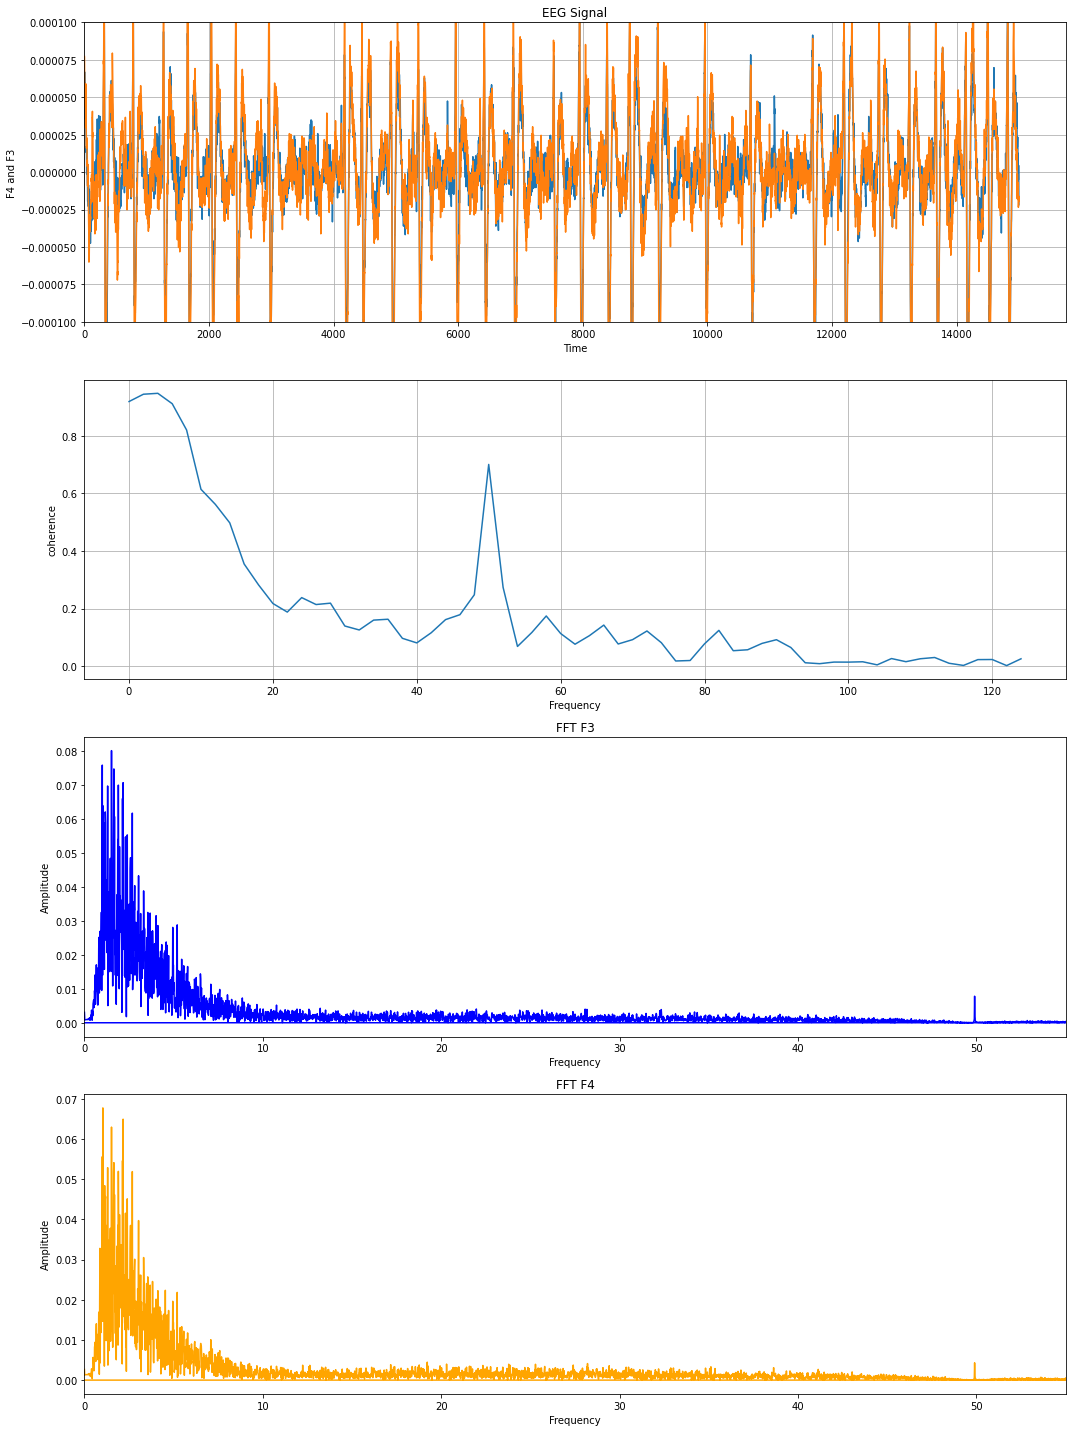

Max F4:  0.00012298
Max F3:  0.000161304
Min F4:  -0.00015215199
Min F3:  -0.000197912
Creating RawArray with float64 data, n_channels=2, n_times=15000
    Range : 0 ... 14999 =      0.000 ...    59.996 secs
Ready.
Creating RawArray with float64 data, n_channels=2, n_times=30000
    Range : 0 ... 29999 =      0.000 ...   119.996 secs
Ready.
Creating RawArray with float64 data, n_channels=2, n_times=30000
    Range : 0 ... 29999 =      0.000 ...   119.996 secs
Ready.
Creating RawArray with float64 data, n_channels=2, n_times=15000
    Range : 0 ... 14999 =      0.000 ...    59.996 secs
Ready.
Creating RawArray with float64 data, n_channels=2, n_times=30000
    Range : 0 ... 29999 =      0.000 ...   119.996 secs
Ready.
Creating RawArray with float64 data, n_channels=2, n_times=30000
    Range : 0 ... 29999 =      0.000 ...   119.996 secs
Ready.
Effective window size : 8.192 (s)


<ipython-input-2-c2c33cc69cac>:35: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.mne_data.plot_psd(fmax=60, picks=channel_locations, average=False)


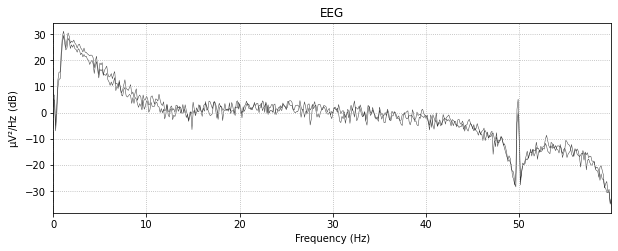

Creating RawArray with float64 data, n_channels=2, n_times=15000
    Range : 0 ... 14999 =      0.000 ...    59.996 secs
Ready.
Creating RawArray with float64 data, n_channels=2, n_times=15000
    Range : 0 ... 14999 =      0.000 ...    59.996 secs
Ready.
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1651 samples (6.604 sec)

Creating RawArray with float64 data, n_channels=2, n_times=15000
    Range : 0 ... 14999 =      0.000 ...    59.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.01 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) metho

C:\Users\miche\anaconda3\envs\mne\lib\site-packages\mbt_pyspt\modules\preprocessingeeg.py:288: RuntimeWarning: filter_length (82501) is longer than the signal (15000), distortion is likely. Reduce filter length or filter a longer signal.
  verbose=verbose)


Creating RawArray with float64 data, n_channels=2, n_times=15000
    Range : 0 ... 14999 =      0.000 ...    59.996 secs
Ready.
Creating RawArray with float64 data, n_channels=2, n_times=15000
    Range : 0 ... 14999 =      0.000 ...    59.996 secs
Ready.
Creating RawArray with float64 data, n_channels=2, n_times=15000
    Range : 0 ... 14999 =      0.000 ...    59.996 secs
Ready.
Creating RawArray with float64 data, n_channels=2, n_times=30000
    Range : 0 ... 29999 =      0.000 ...   119.996 secs
Ready.
Creating RawArray with float64 data, n_channels=2, n_times=30000
    Range : 0 ... 29999 =      0.000 ...   119.996 secs
Ready.
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1651 sampl

C:\Users\miche\anaconda3\envs\mne\lib\site-packages\mbt_pyspt\modules\preprocessingeeg.py:288: RuntimeWarning: filter_length (82501) is longer than the signal (30000), distortion is likely. Reduce filter length or filter a longer signal.
  verbose=verbose)


Creating RawArray with float64 data, n_channels=2, n_times=30000
    Range : 0 ... 29999 =      0.000 ...   119.996 secs
Ready.
Creating RawArray with float64 data, n_channels=2, n_times=30000
    Range : 0 ... 29999 =      0.000 ...   119.996 secs
Ready.
Creating RawArray with float64 data, n_channels=2, n_times=30000
    Range : 0 ... 29999 =      0.000 ...   119.996 secs
Ready.
Creating RawArray with float64 data, n_channels=2, n_times=30000
    Range : 0 ... 29999 =      0.000 ...   119.996 secs
Ready.
Creating RawArray with float64 data, n_channels=2, n_times=30000
    Range : 0 ... 29999 =      0.000 ...   119.996 secs
Ready.
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1651 sampl

C:\Users\miche\anaconda3\envs\mne\lib\site-packages\mbt_pyspt\modules\preprocessingeeg.py:288: RuntimeWarning: filter_length (82501) is longer than the signal (30000), distortion is likely. Reduce filter length or filter a longer signal.
  verbose=verbose)


Creating RawArray with float64 data, n_channels=2, n_times=30000
    Range : 0 ... 29999 =      0.000 ...   119.996 secs
Ready.
Creating RawArray with float64 data, n_channels=2, n_times=30000
    Range : 0 ... 29999 =      0.000 ...   119.996 secs
Ready.
Creating RawArray with float64 data, n_channels=2, n_times=30000
    Range : 0 ... 29999 =      0.000 ...   119.996 secs
Ready.
Effective window size : 8.192 (s)


<ipython-input-2-c2c33cc69cac>:41: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  preprocessed.mne_data.plot_psd(fmax=35, picks=channel_locations, average=False)


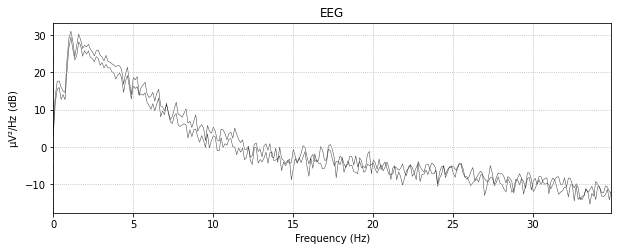

Effective window size : 8.192 (s)


<ipython-input-2-c2c33cc69cac>:42: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  prep_b_eo.mne_data.plot_psd(fmax=35, picks=channel_locations, average=False)


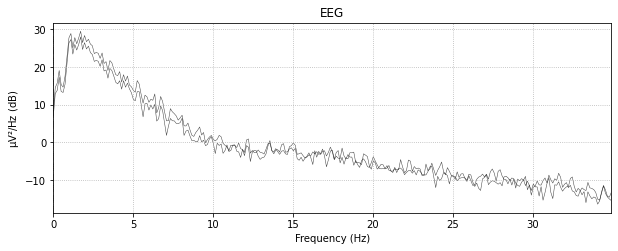

Effective window size : 8.192 (s)


<ipython-input-2-c2c33cc69cac>:43: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  prep_b_ec.mne_data.plot_psd(fmax=35, picks=channel_locations, average=False)


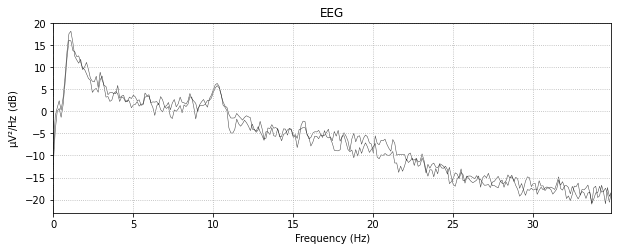

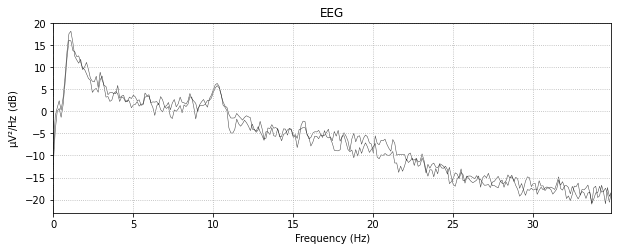

In [2]:
file = open("../data/prepared/s010701_prepared.json")
data = json.load(file)
channel_data = data['trials']['EO/class_1_A']['eeg']
baseline_eo = data['trials']['enter/resting_EO']['eeg']
baseline_ec = data['trials']['enter/resting_EC']['eeg']
#annotations_v = data['trials']['EO/class_3_A']['annotations']['x']
#annotations_a = data['trials']['EO/class_3_A']['annotations']['y']
#print(round(len(annotations_a)/ 60))

print(np.array(channel_data).shape)
plot_study(channel_data, len(channel_data[0]), raw_xlim=[0, None])
print("Max F4: ", max(channel_data[0]))
print("Max F3: ", max(channel_data[1]))
print("Min F4: ", min(channel_data[0]))
print("Min F3: ", min(channel_data[1]))

sampling_rate = data['sampRate']
channel_locations = data['acquisitionLocation']
raw = MyBrainEEGData(channel_data, sampling_rate, channel_locations)
raw_b_eo = MyBrainEEGData(baseline_eo, sampling_rate, channel_locations)
raw_b_ec = MyBrainEEGData(baseline_ec, sampling_rate, channel_locations)

list_pp = [
    ('notch_filter', {"freqs": [50,100]}),
    ('filter_mne', { "l_freq": 0.01, "h_freq": 30}),
    ('median_filter', None),
    ('remove_dc_sec_by_sec', None), 
    #('sliding_split_eeg_data', { 'buf': 5, 'sliding_step': 1}),
    ('interpolate_all_qc', None)
    ]
ppflow = PreprocessingFlow(eeg_data=raw, preprocessing_list=list_pp)
ppflow_b_eo = PreprocessingFlow(eeg_data=raw_b_eo, preprocessing_list=list_pp)
ppflow_b_ec = PreprocessingFlow(eeg_data=raw_b_ec, preprocessing_list=list_pp)

raw.mne_data.plot_psd(fmax=60, picks=channel_locations, average=False)
#raw.mne_data.plot(duration=6000, n_channels=2,remove_dc=True)

preprocessed = ppflow()
prep_b_eo = ppflow_b_eo()
prep_b_ec = ppflow_b_ec()
preprocessed.mne_data.plot_psd(fmax=35, picks=channel_locations, average=False)
prep_b_eo.mne_data.plot_psd(fmax=35, picks=channel_locations, average=False)
prep_b_ec.mne_data.plot_psd(fmax=35, picks=channel_locations, average=False)


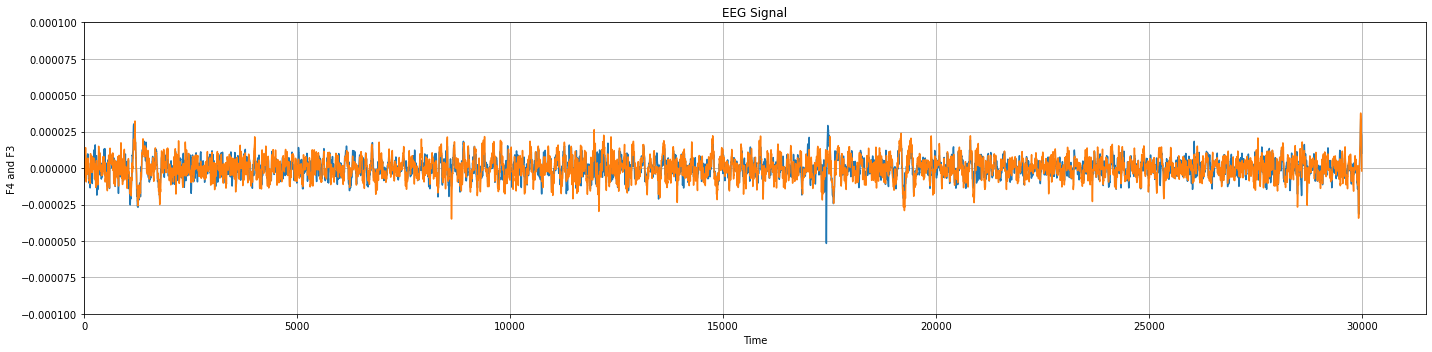

In [3]:
plot_signal(prep_b_ec.matrix_data, len(prep_b_ec.matrix_data[0]), raw_xlim=[0, None])

In [4]:
clean_data = compute_asr_reconstruction(preprocessed, train_duration=120, train_baseline=prep_b_ec, sfreq=sampling_rate, win_len=0.5, win_overlap=0.66)

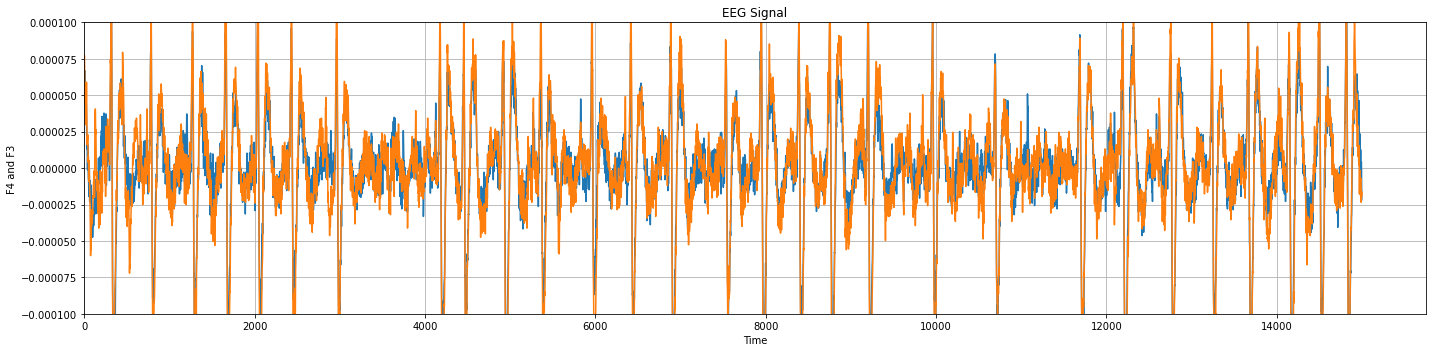

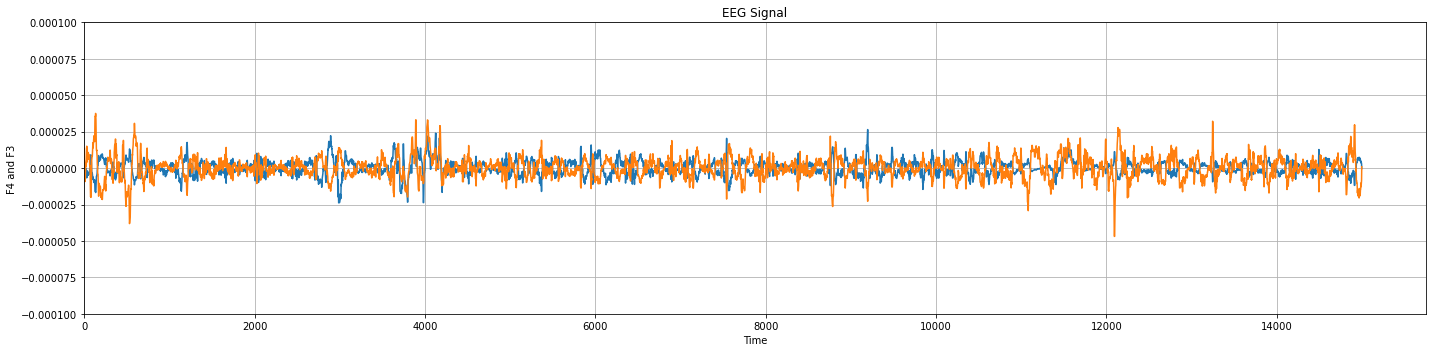

In [12]:
plot_signal(channel_data, len(channel_data[0]), raw_xlim=[0, None])
plot_signal(clean_data, len(clean_data[0]), raw_xlim=[0,  None])

9.396418828207705e-23 1.4456028966473393e-23
(2, 30000)


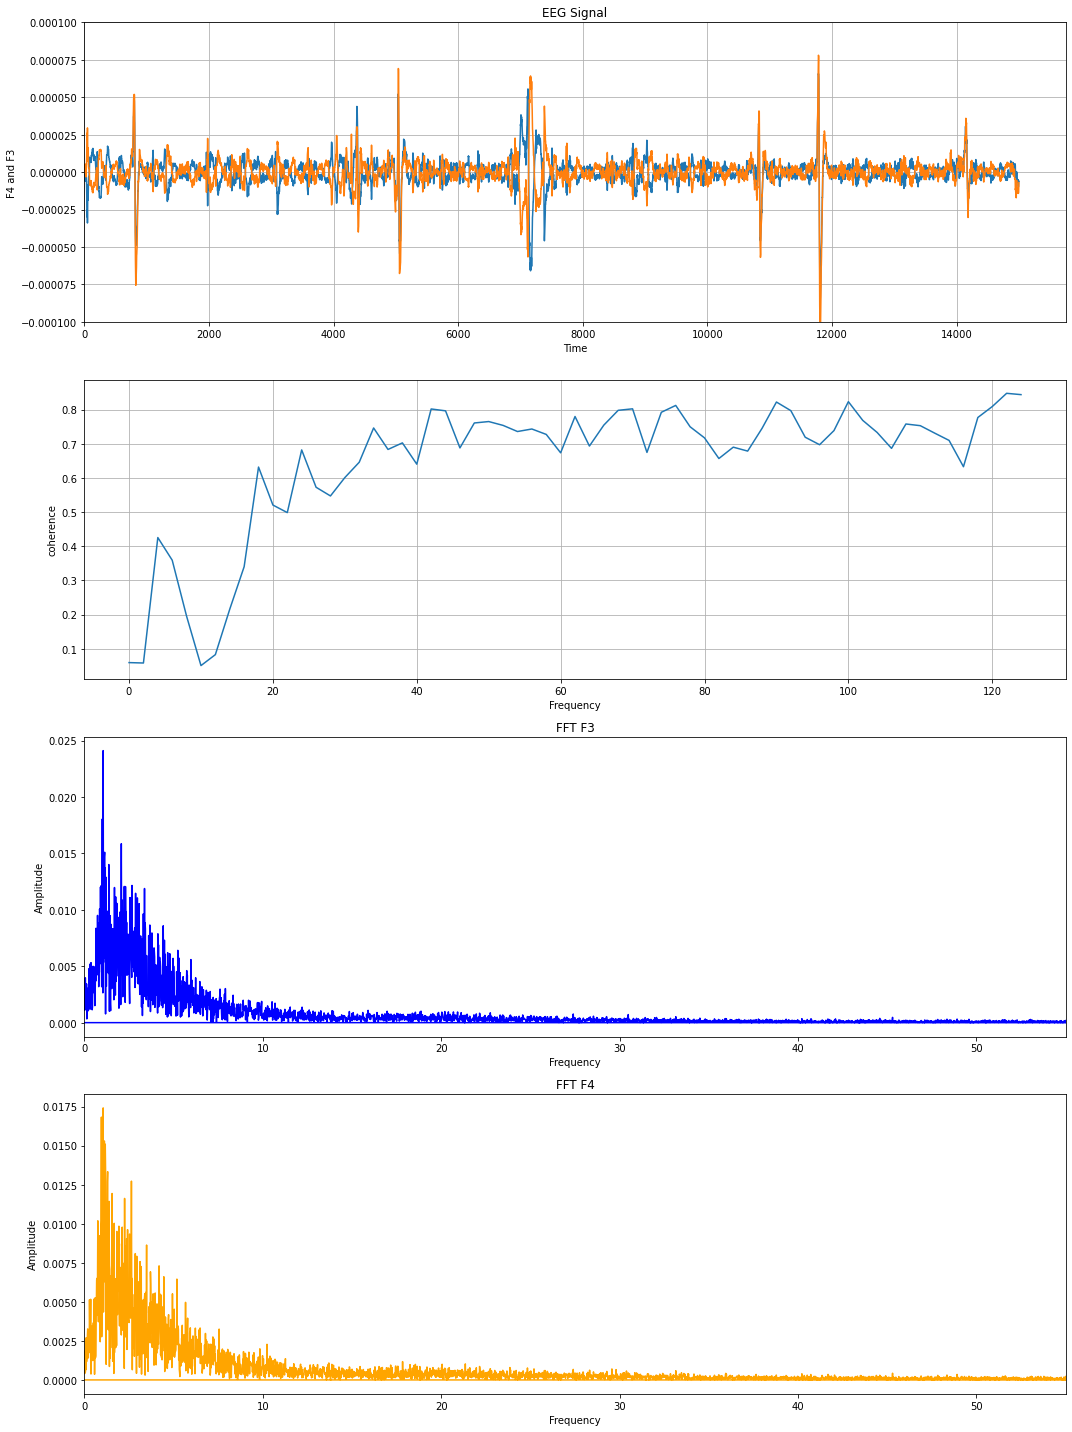

Max F4:  6.568675015272827e-05
Max F3:  7.806819747474273e-05
Min F4:  -8.568909208978834e-05
Min F3:  -0.00011164020005740484


In [33]:
#preprocessed = ppflow()
mean_b_eo_f4 = np.mean(prep_b_eo.matrix_data[0])
mean_b_eo_f3 = np.mean(prep_b_eo.matrix_data[1])

print(mean_b_eo_f4, mean_b_eo_f3)
clean_data[0] = clean_data[0] - mean_b_eo_f4
clean_data[1] = clean_data[1] - mean_b_eo_f3

#preprocessed.matrix_data[0] = baseline_als_optimized(preprocessed.matrix_data[0], 10000, 0.1)

print(prep_b_ec.matrix_data.shape)
duration = len(clean_data[0])
plot_study(clean_data, duration, raw_xlim=[0, None])
print("Max F4: ", max(clean_data[0]))
print("Max F3: ", max(clean_data[1]))
print("Min F4: ", min(clean_data[0]))
print("Min F3: ", min(clean_data[1]))


fm_theta_idx = 0 #average theta power between AF3 and AF4 𝐹𝑚𝑡𝐼=𝑚𝑒𝑎𝑛(𝑃𝑜𝑤𝑆𝑡𝑖𝑚𝜗𝐹𝑧)𝑚𝑒𝑎𝑛(𝑃𝑜𝑤𝐵𝑎𝑠𝜗𝐹𝑧)
aw_idx = 0 #differences in absolute Alpha power in both channels  𝐴𝑊= ln(𝑃𝑜𝑤𝛼𝐹𝑝2) − ln(𝑃𝑜𝑤𝛼𝐹𝑝1).
alpha_asym = 0 # aysmmetry in mean Alpha power
mental_load = 0 # beta power
#familiarity
#liking
#valence_ann
#arousal_ann

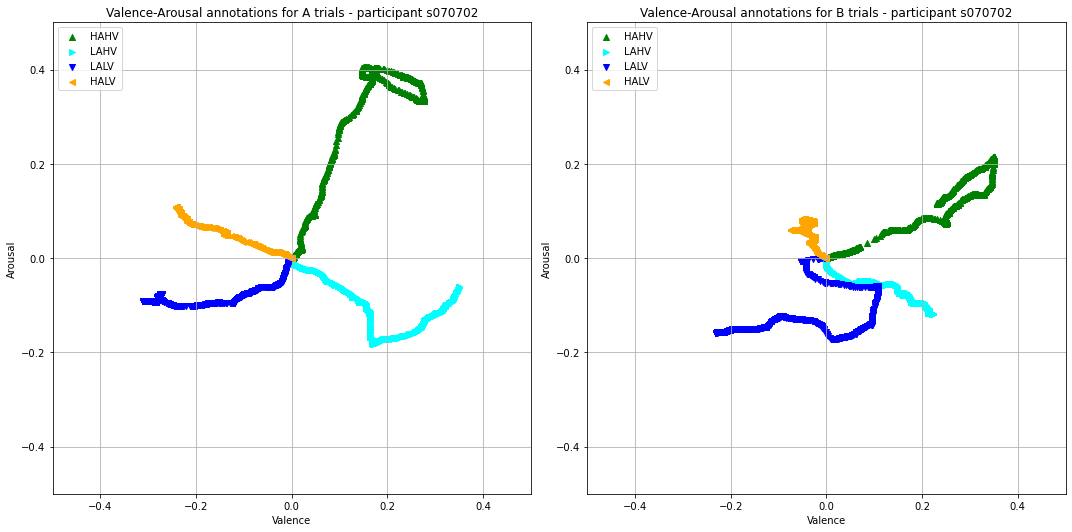

In [3]:
# Plotting Scatter Plot of annotations

file = open("../data/prepared/s070702_prepared.json") #good subject
data = json.load(file)

plot_annotations(data)

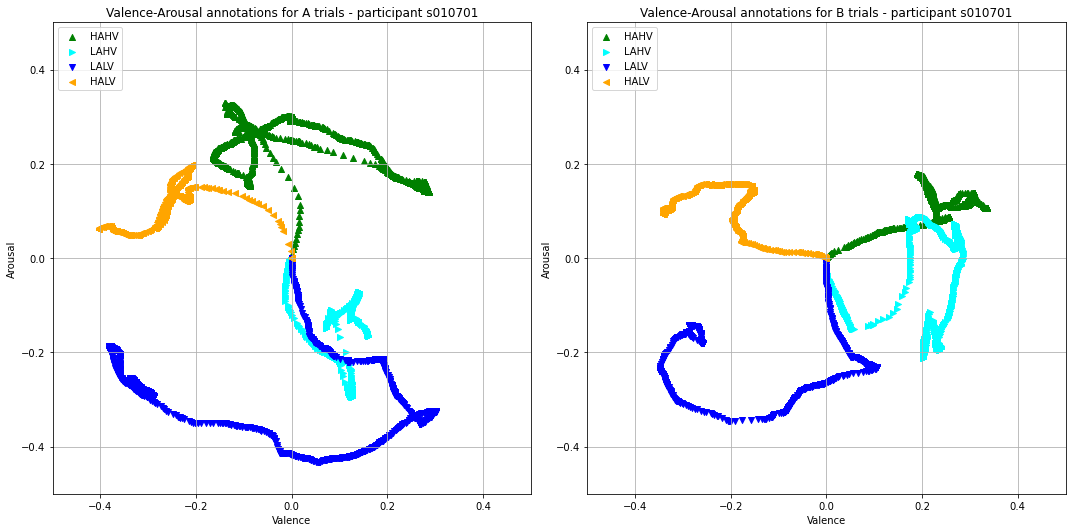

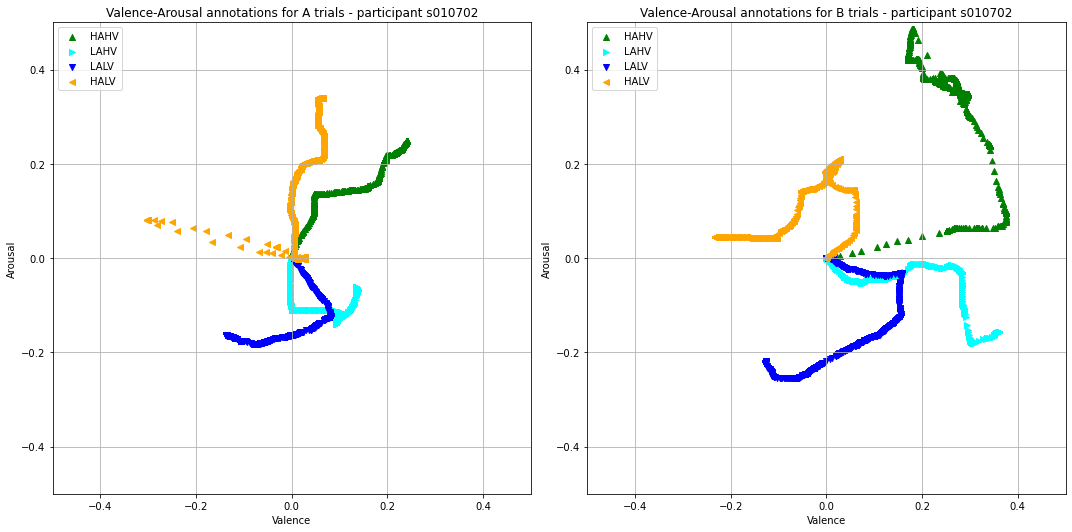

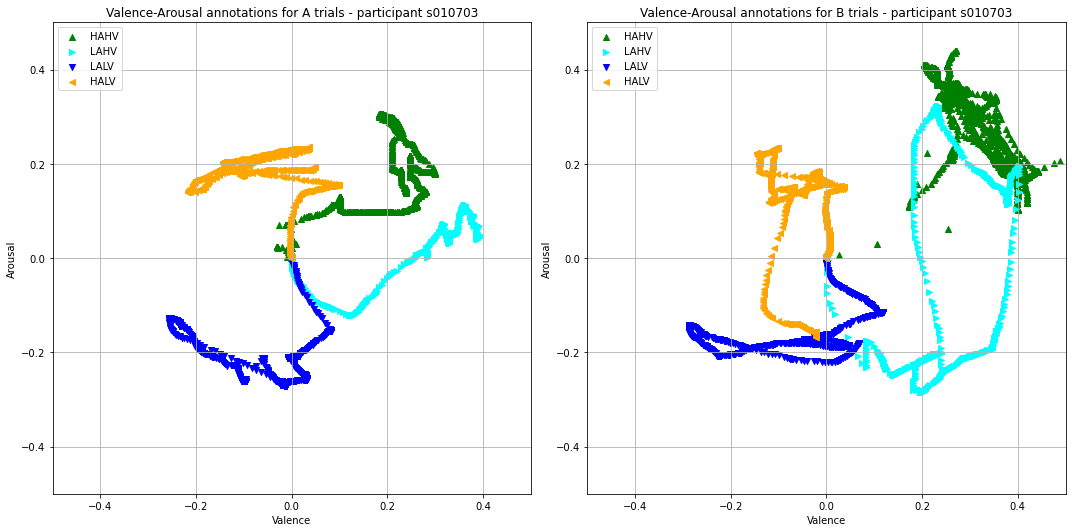

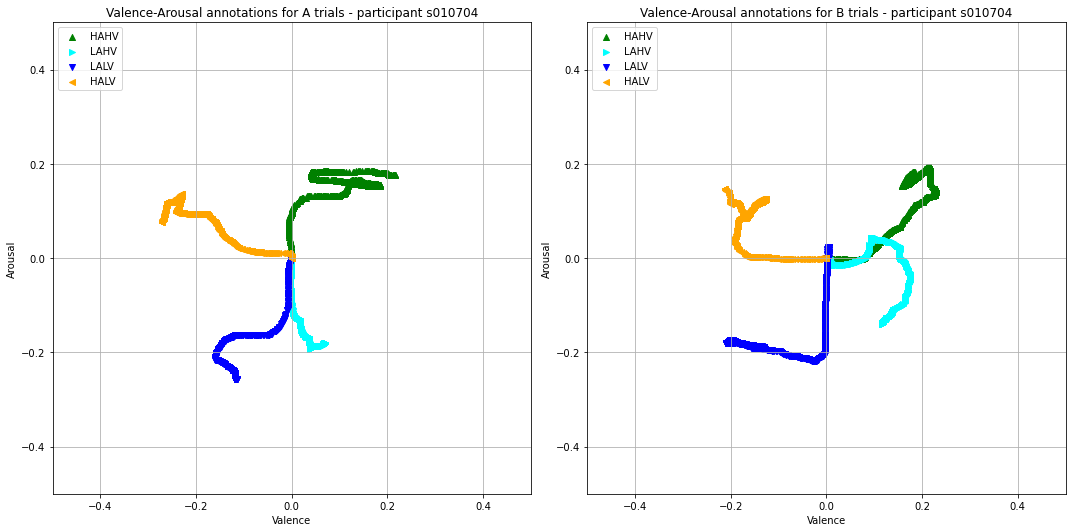

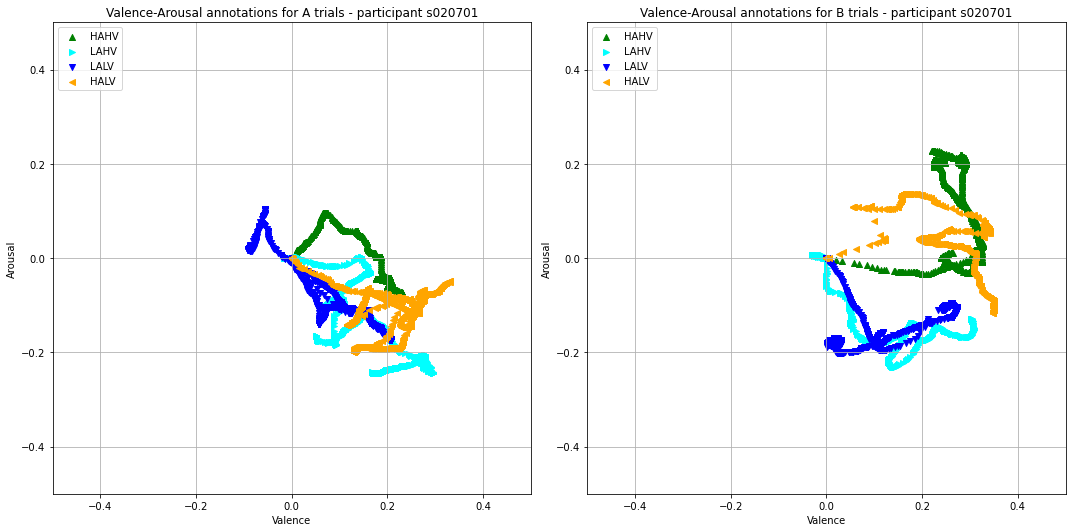

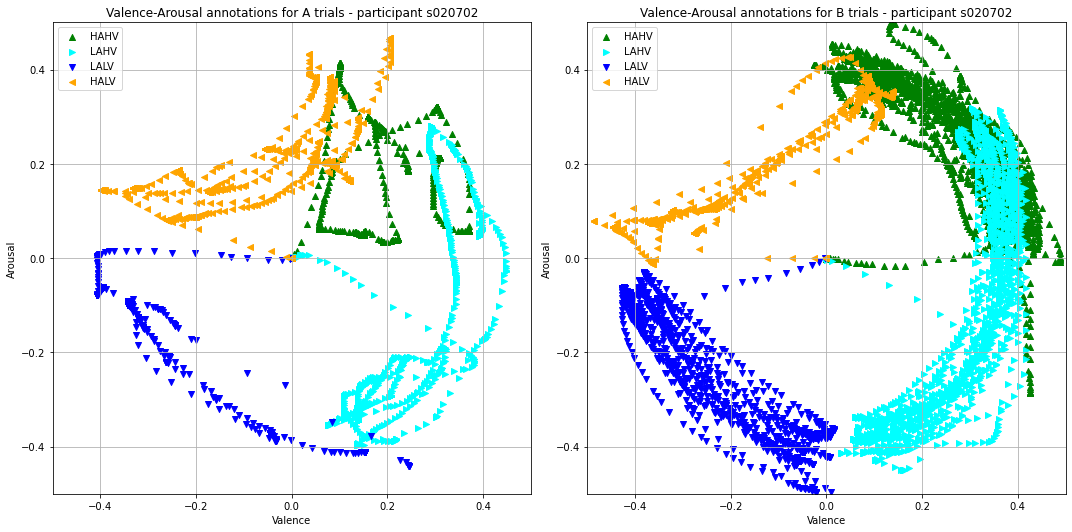

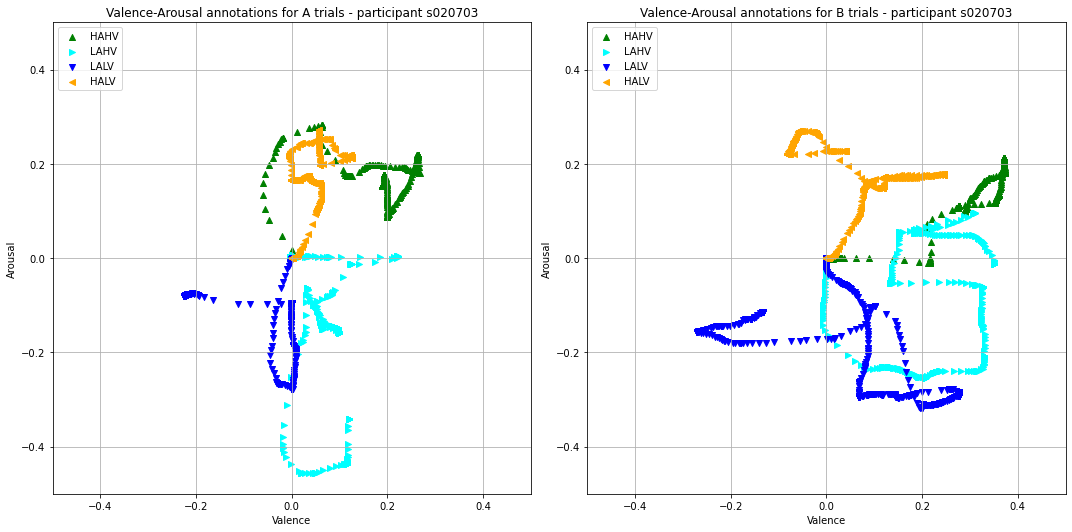

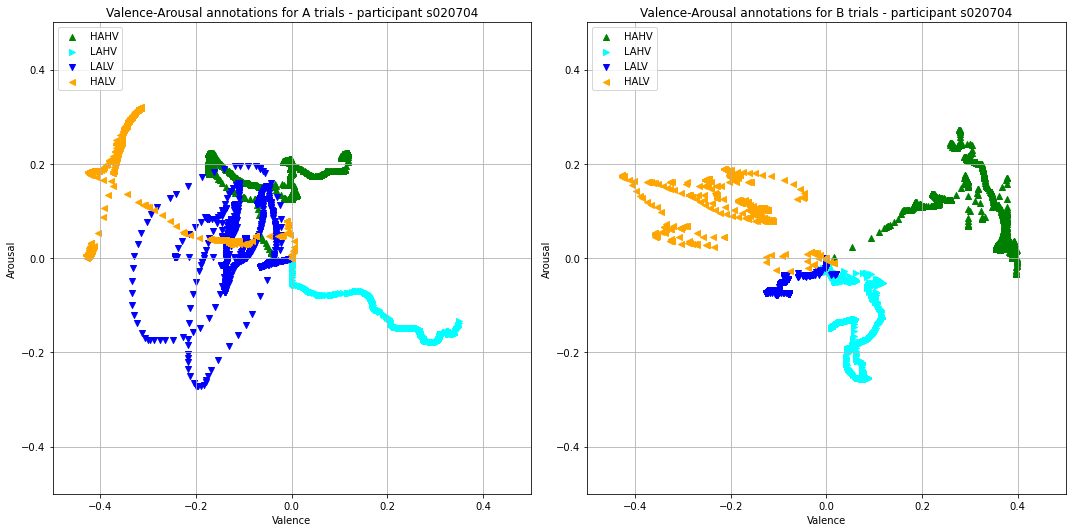

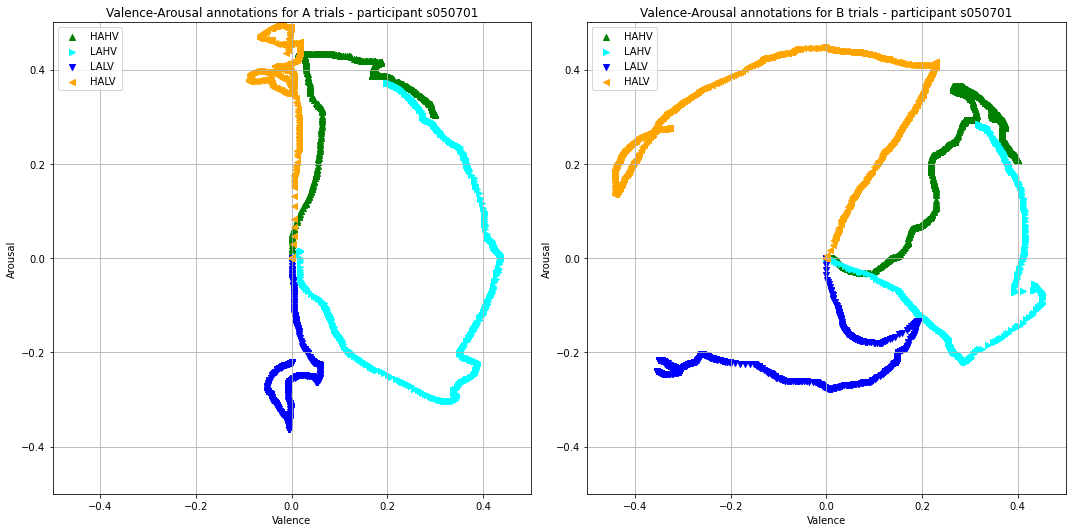

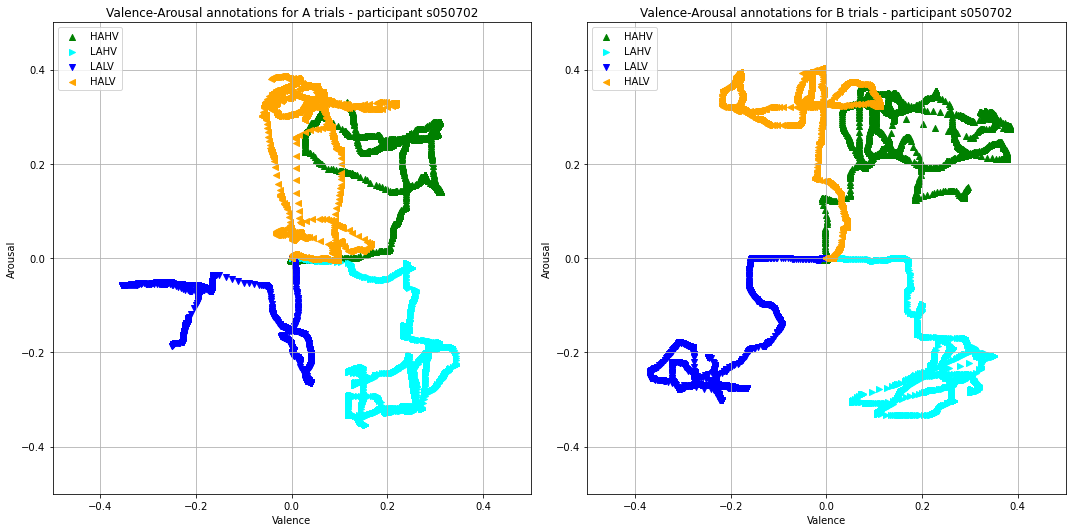

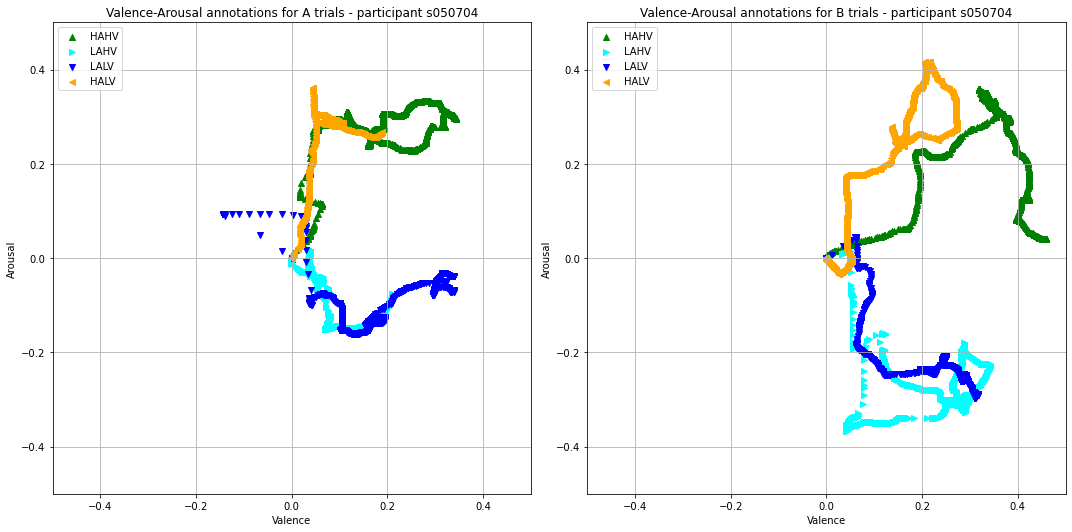

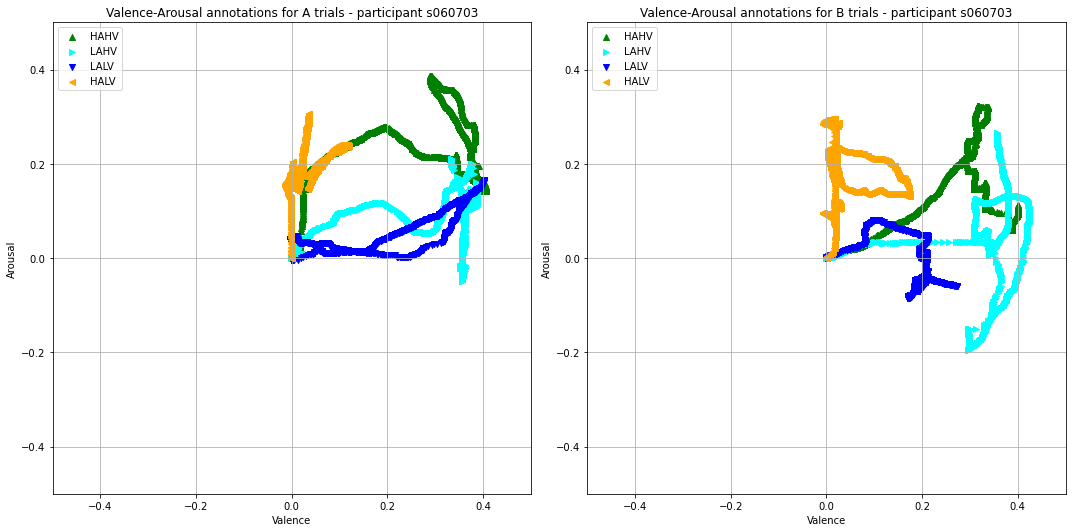

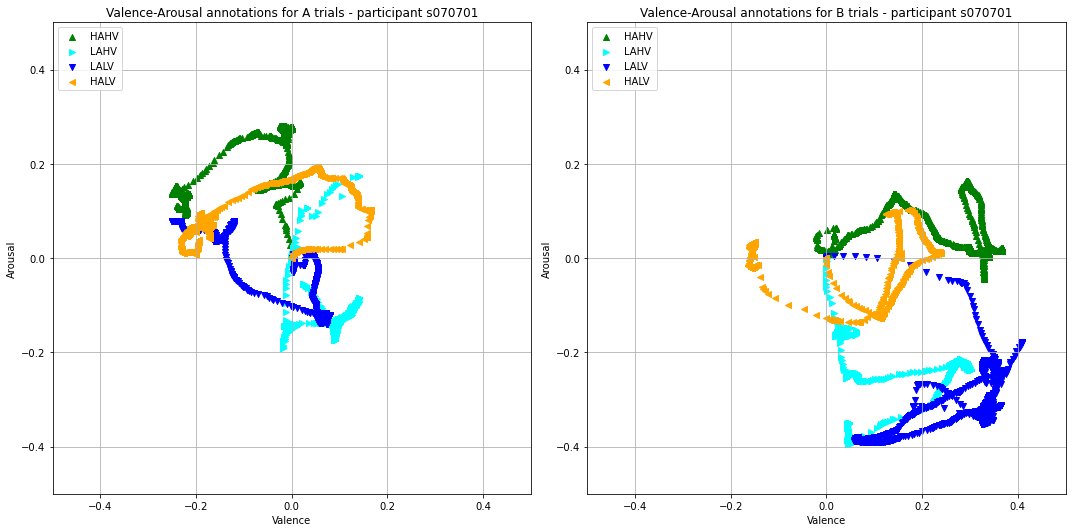

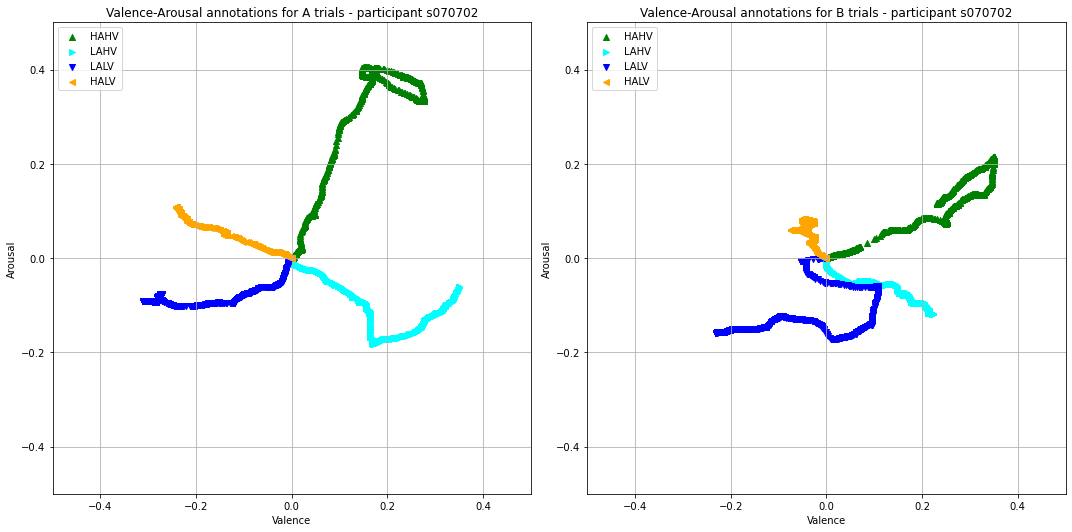

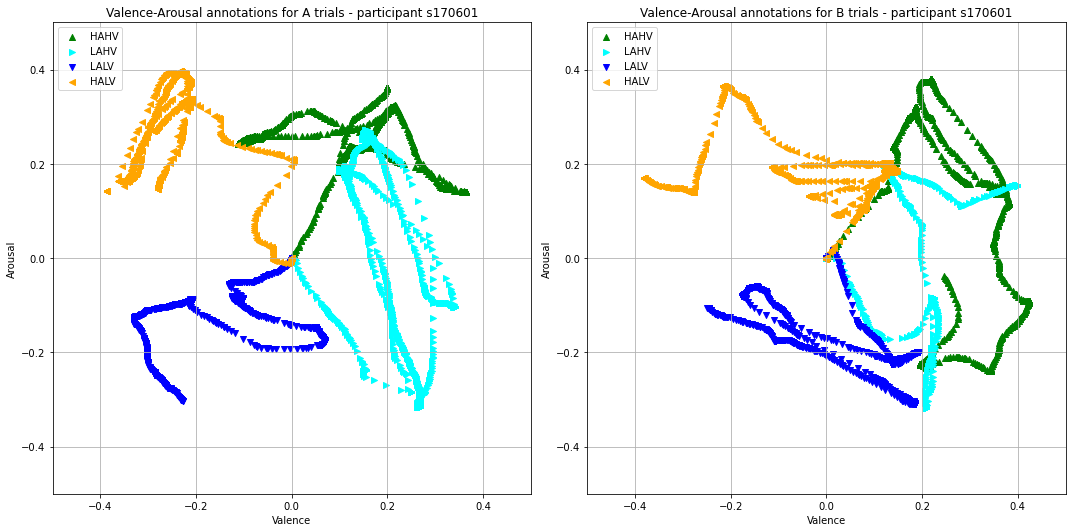

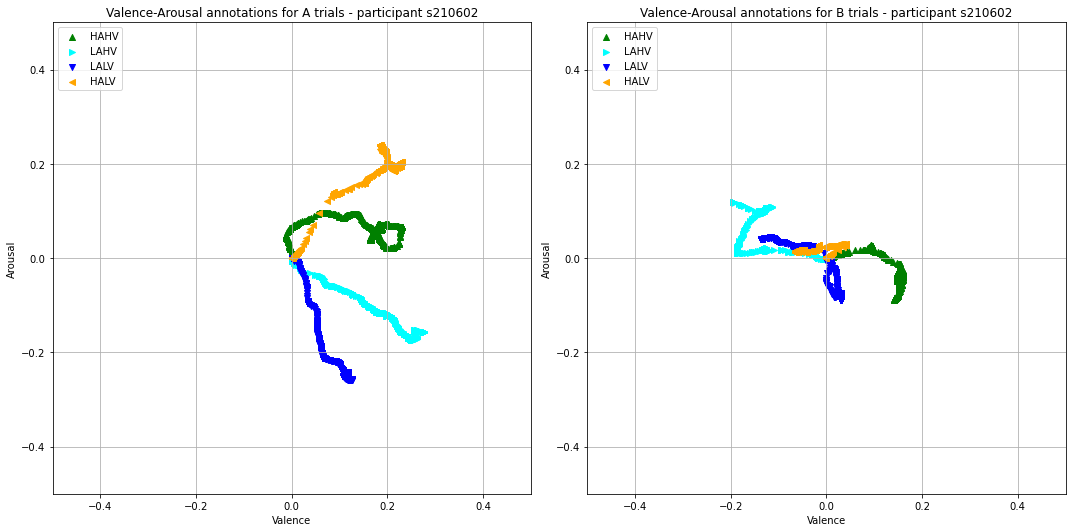

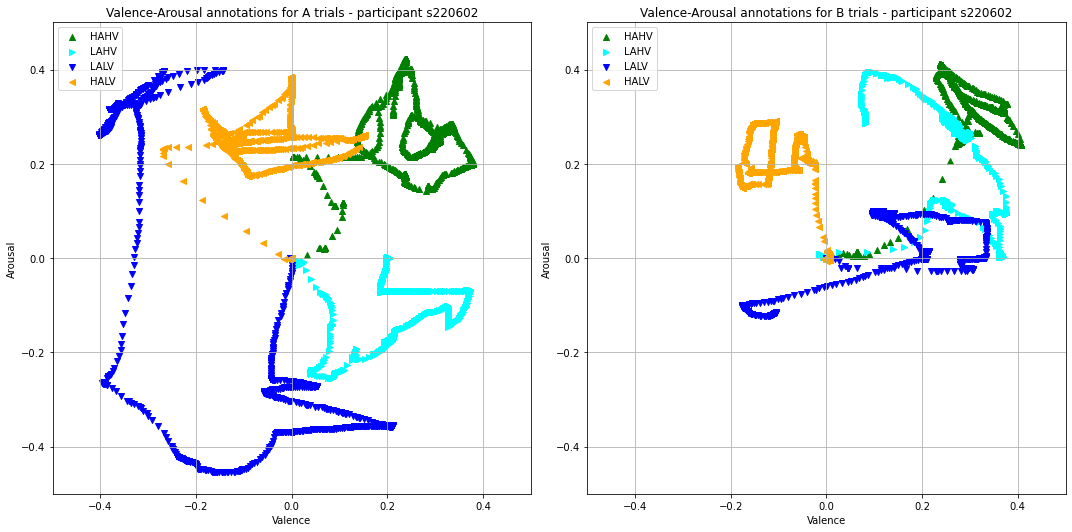

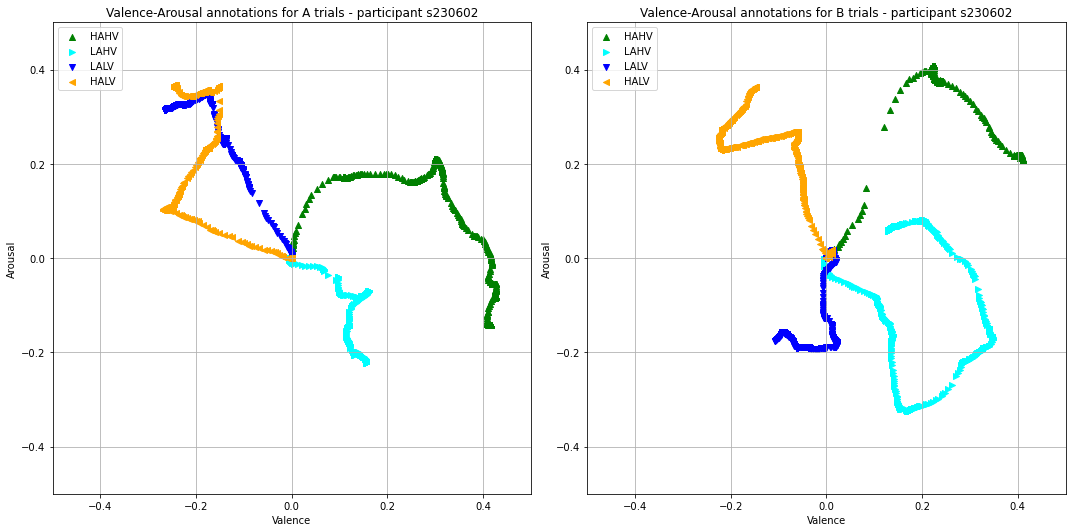

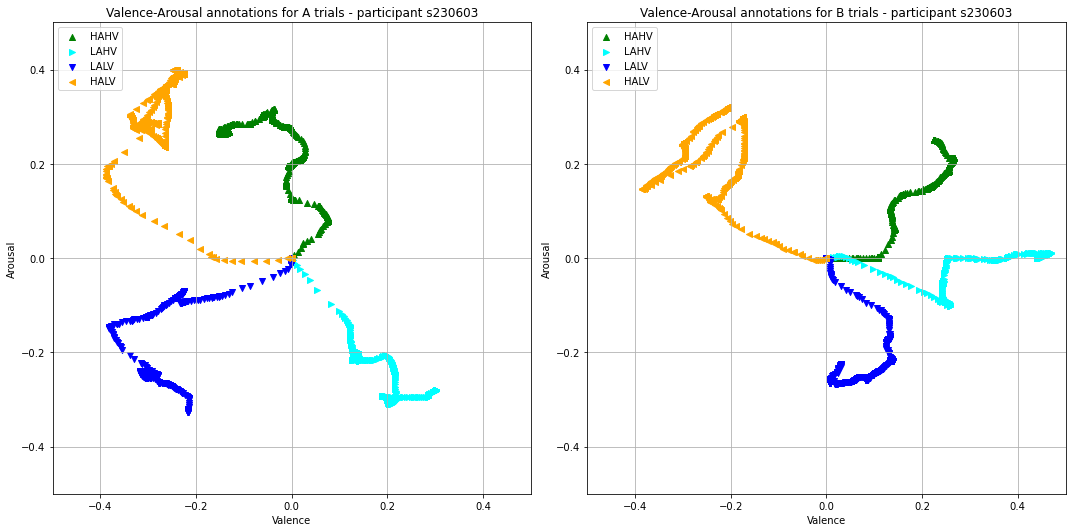

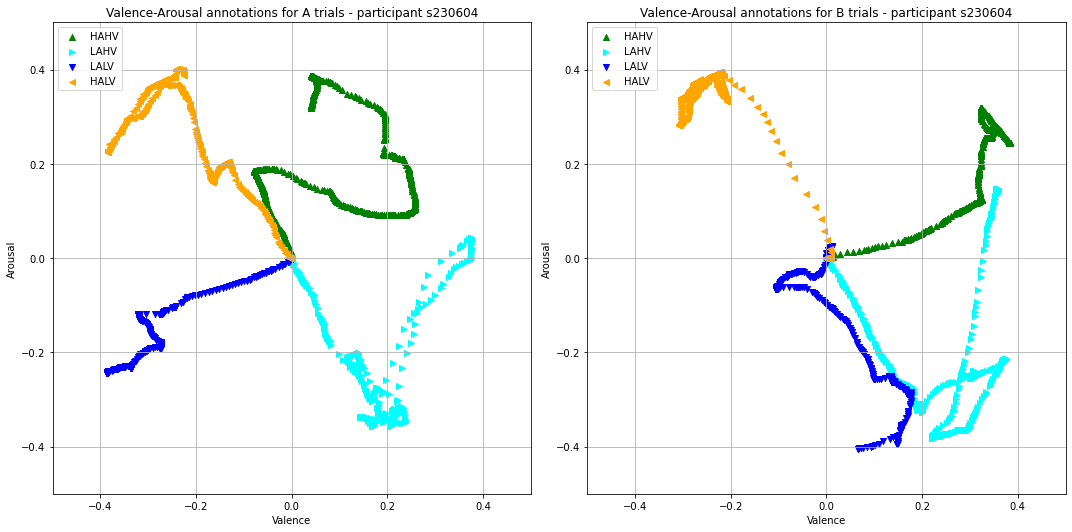

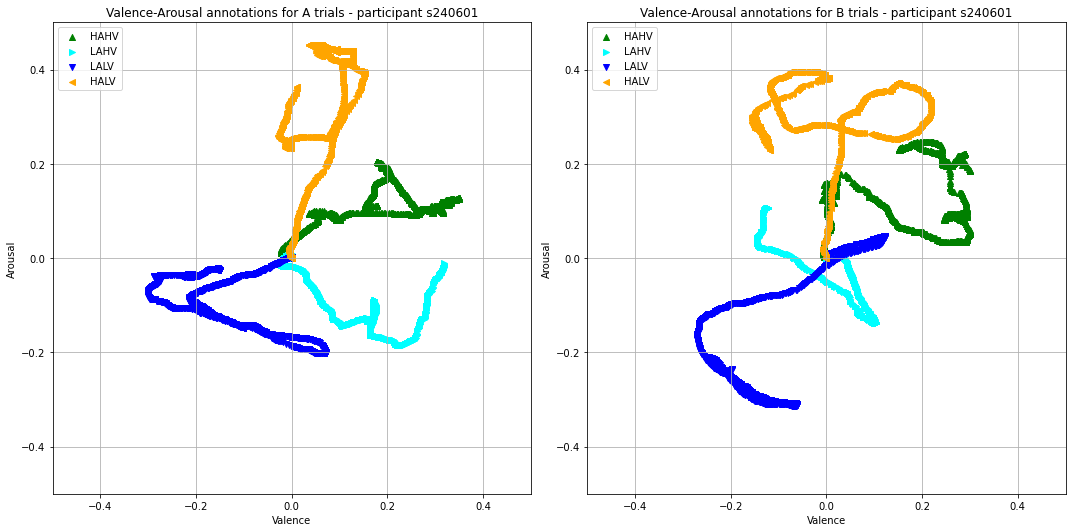

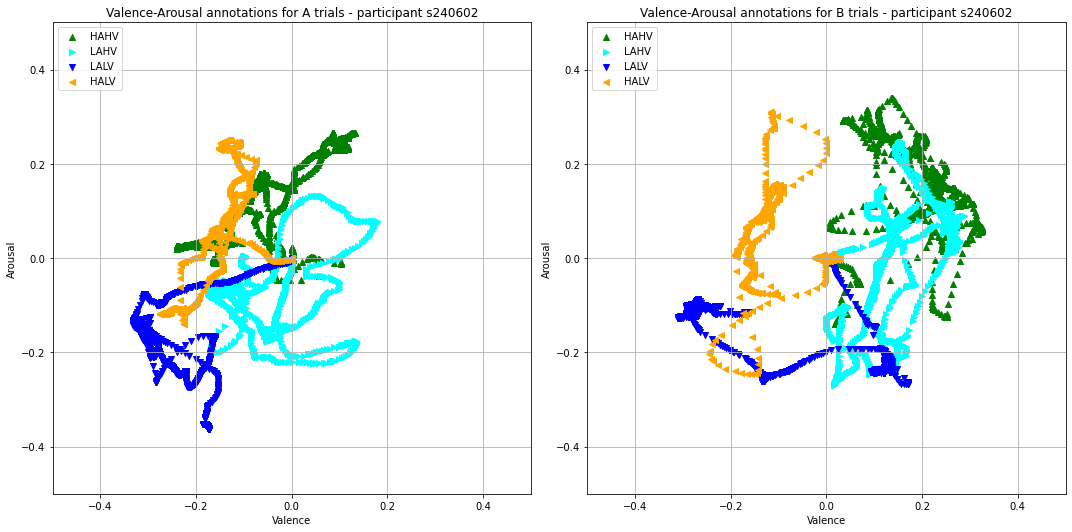

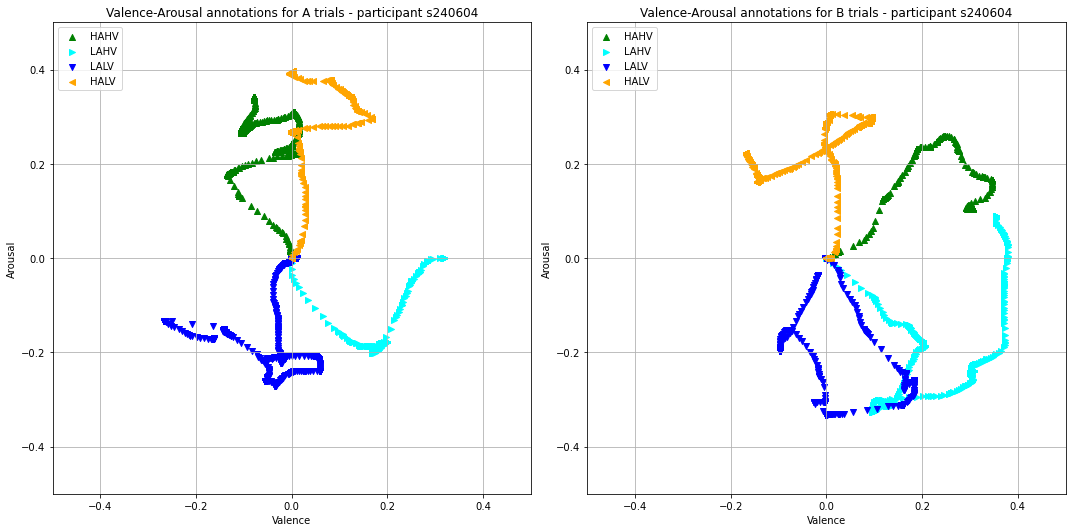

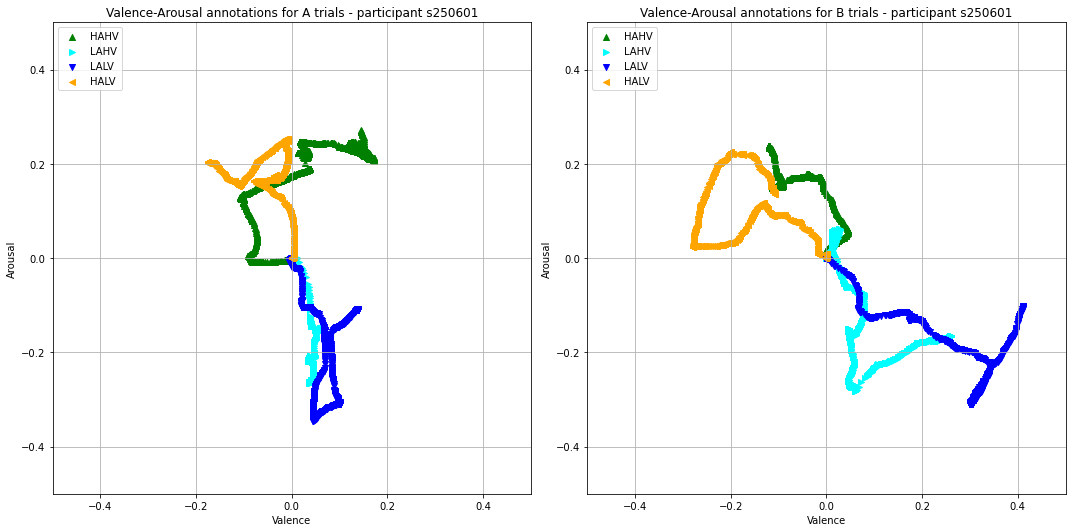

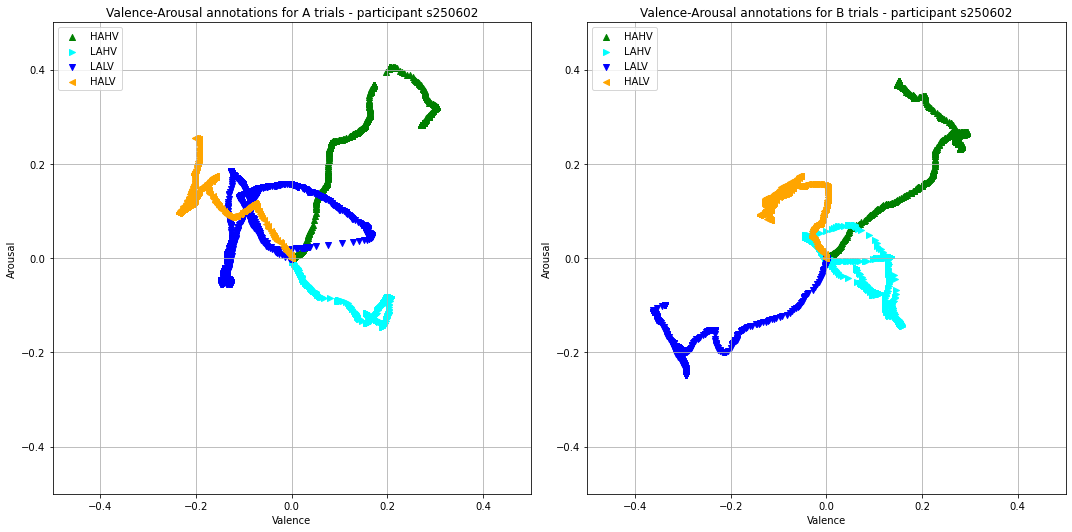

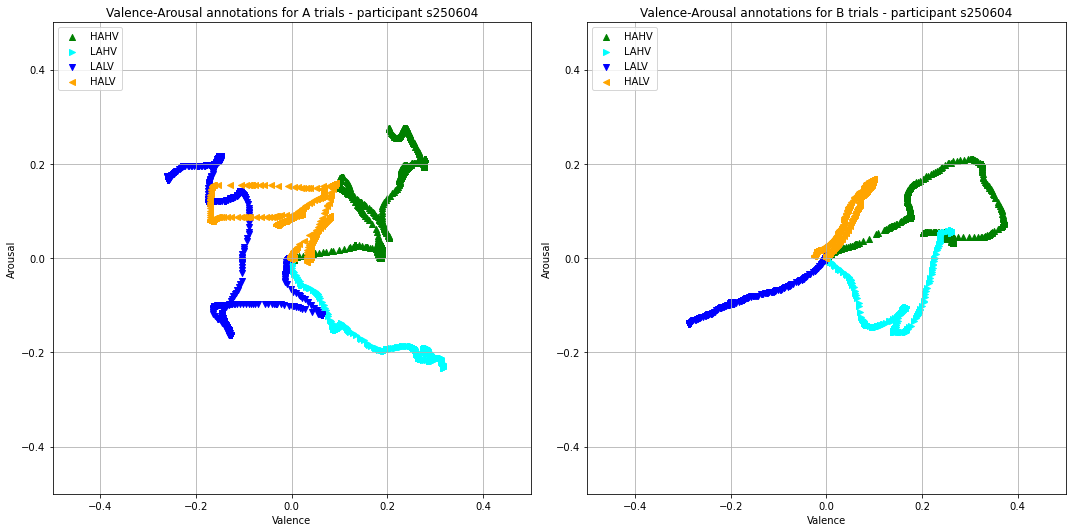

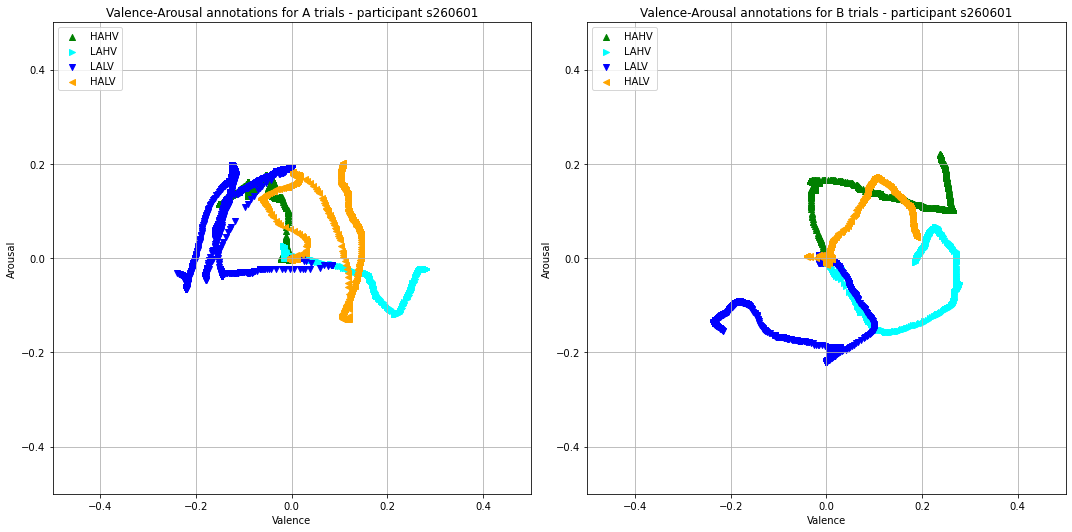

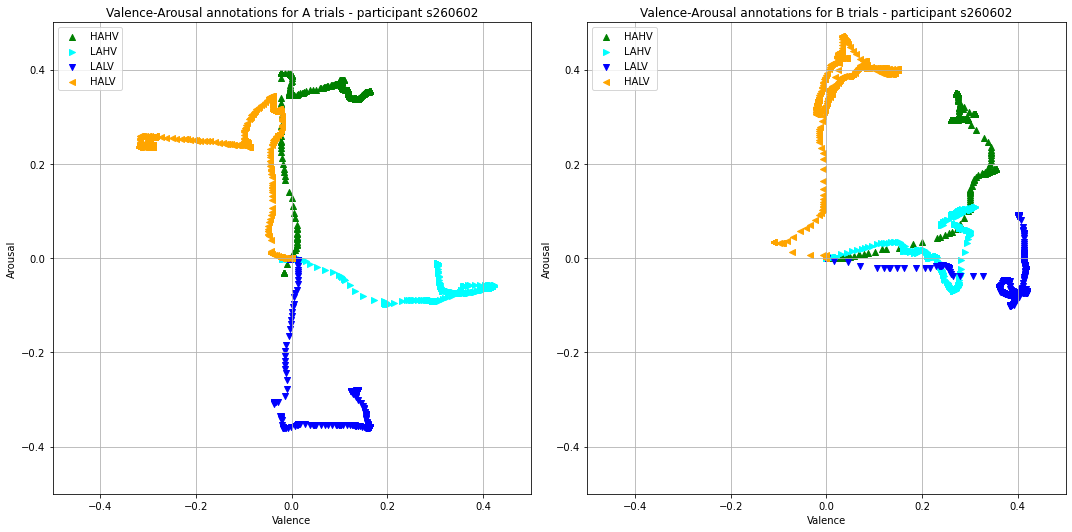

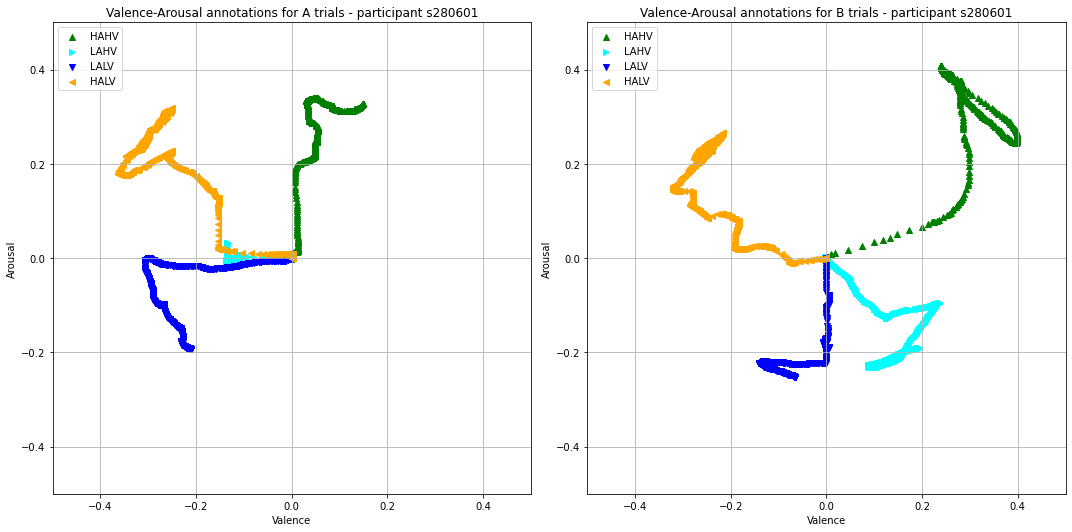

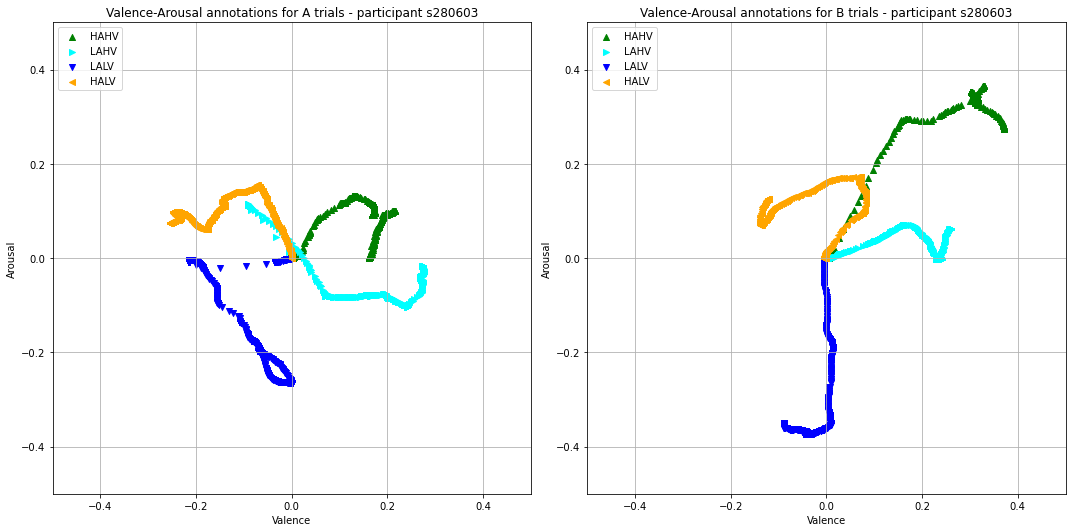

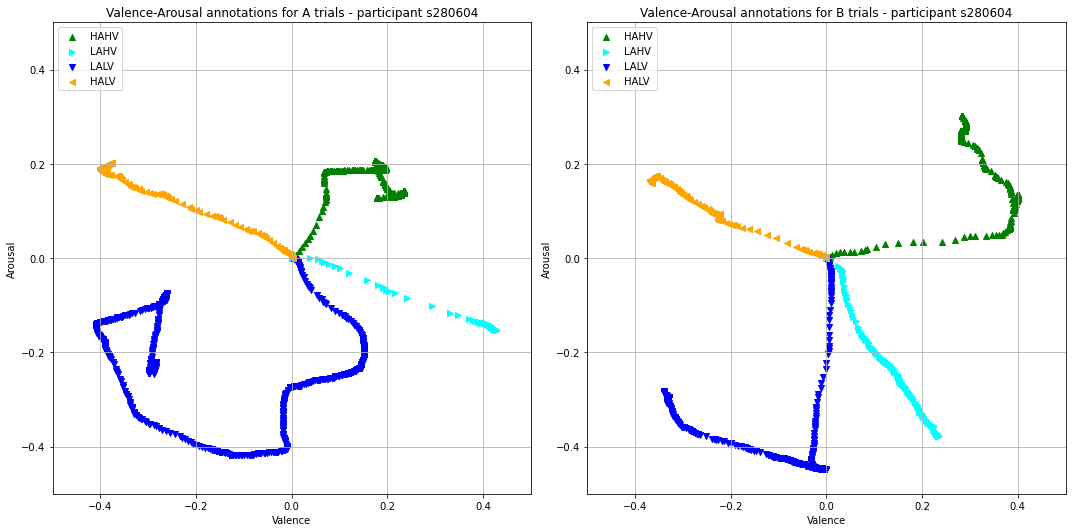

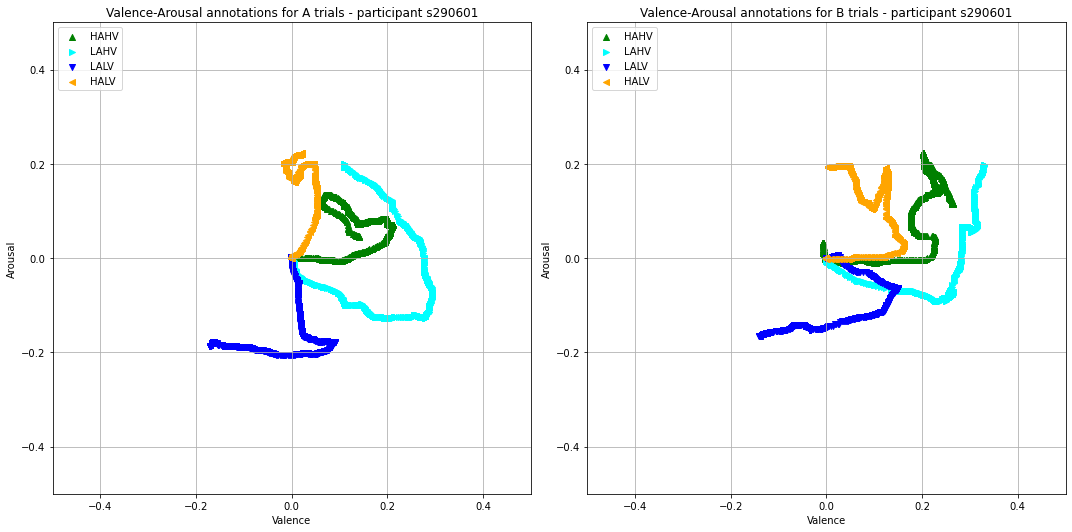

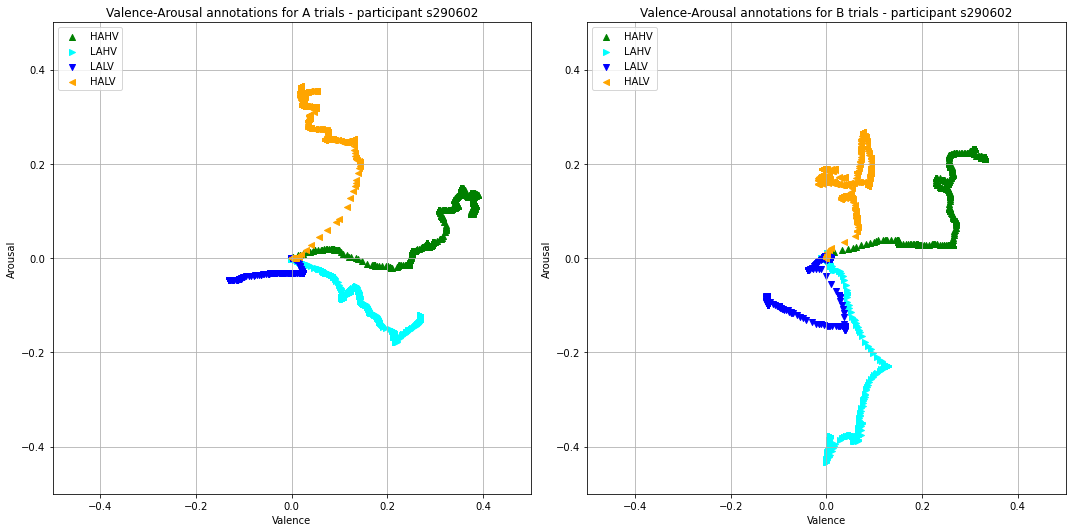

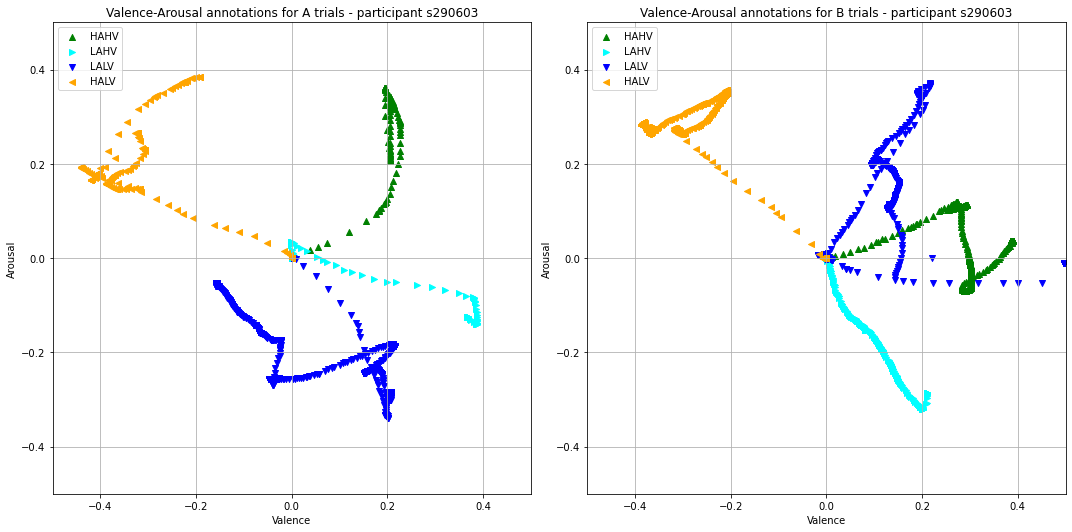

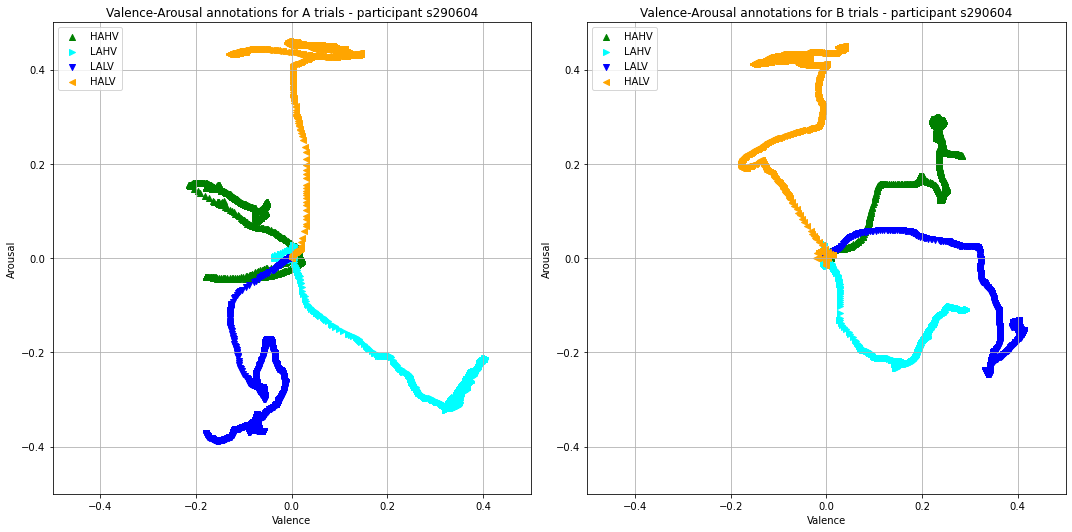

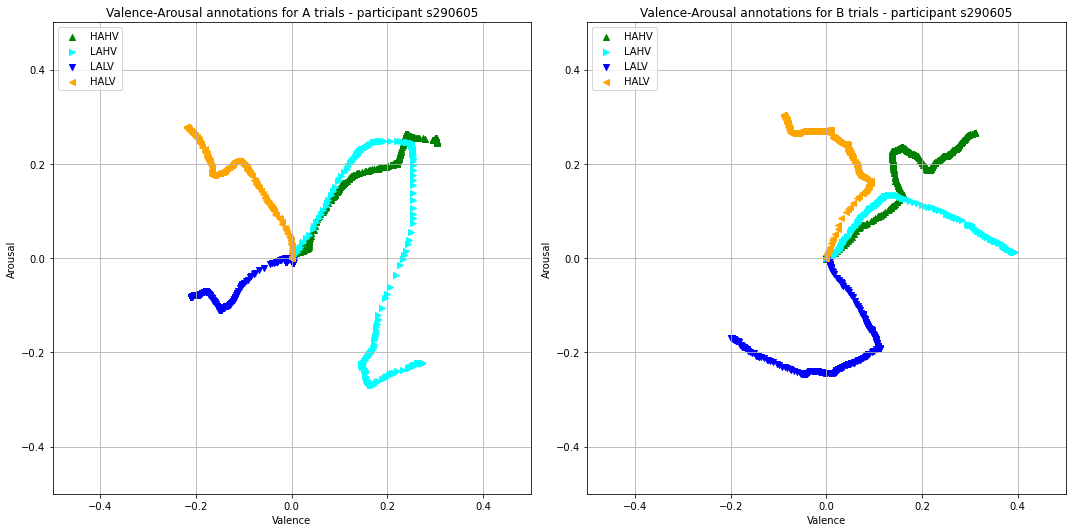

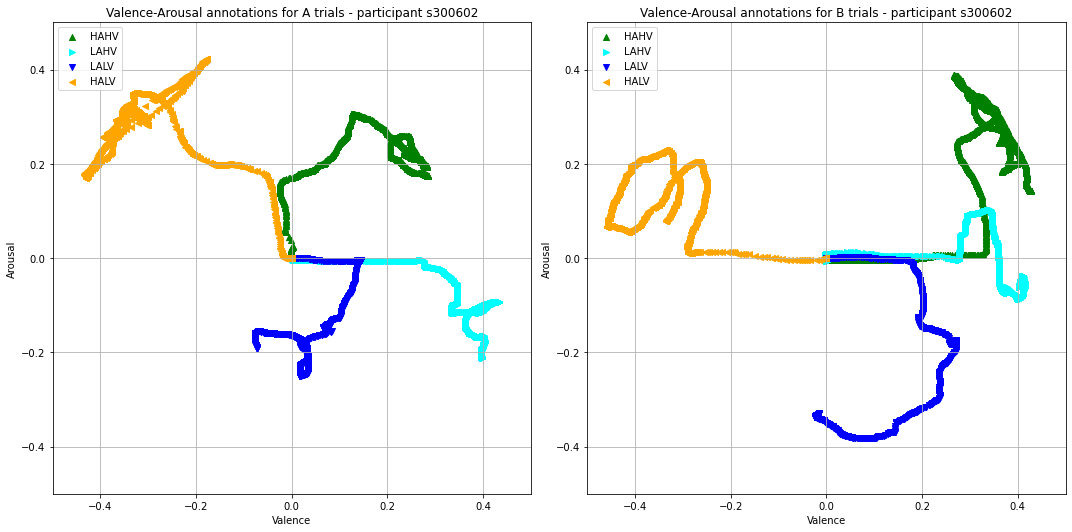

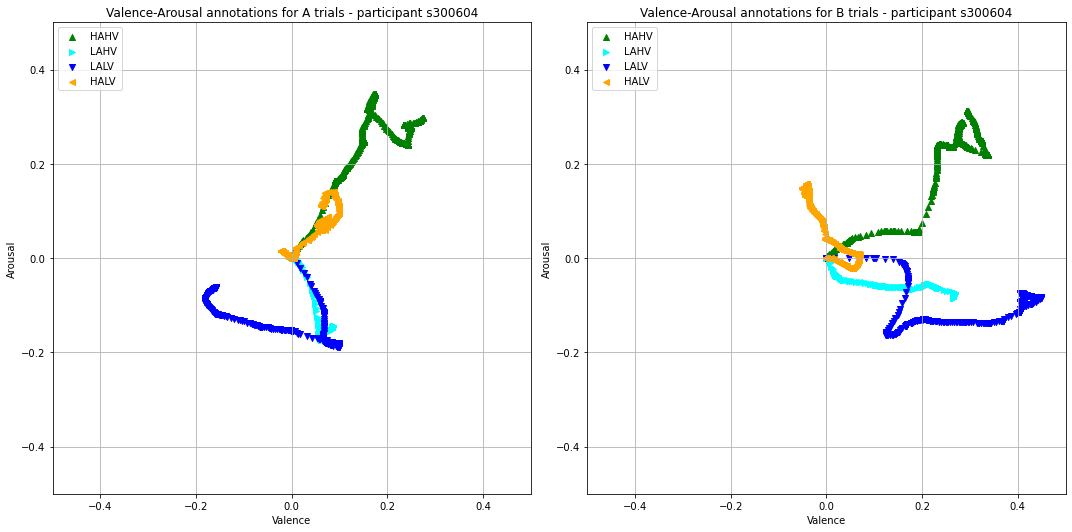

In [4]:
for participant_id in dataset:
    data = dataset[participant_id]    
    plot_annotations(data)

In [32]:
# LINEAR REGRESSION

# Load the EM dataset
file = open("../data/prepared/s010701_prepared.json")
data = json.load(file)


# Only trial 1 plot
x = np.array(data['trials']['EO/class_1_A']['annotations']['x']).reshape(-1, 1)
y = np.array(data['trials']['EO/class_1_A']['eeg'][0])

# Use only one feature
#diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
x_train = x[:-20]
x_test = x[-20:]

# Split the targets into training/testing sets
y_train = y[:-20]
y_test = y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(x_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(x_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

# Plot outputs
plt.scatter(x_test, y_test,  color='black')
plt.plot(x_test, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [2782, 14980]

Creating RawArray with float64 data, n_channels=2, n_times=15000
    Range : 0 ... 14999 =      0.000 ...    59.996 secs
Ready.
Creating RawArray with float64 data, n_channels=2, n_times=15000
    Range : 0 ... 14999 =      0.000 ...    59.996 secs
Ready.
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1651 samples (6.604 sec)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 20 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 0.50, 20.00 Hz: -6.02, -6.02 dB

Setting up band-stop filter from 39 - 41 Hz

FIR filt

<ipython-input-4-8af3fd0af443>:17: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw_filter.plot_psd(fmax=35, picks=channel_locations, average=False)


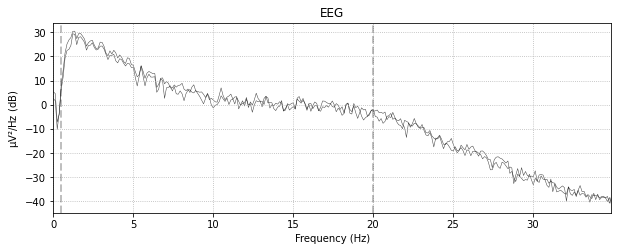

Effective window size : 8.192 (s)


<ipython-input-4-8af3fd0af443>:18: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw_filter_eo.plot_psd(fmax=35, picks=channel_locations, average=False)


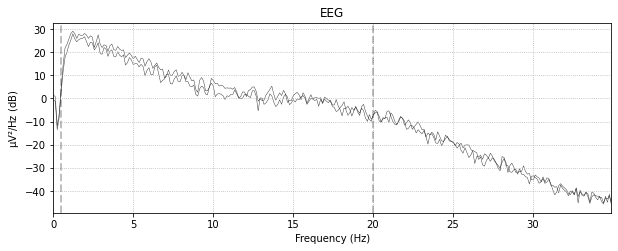

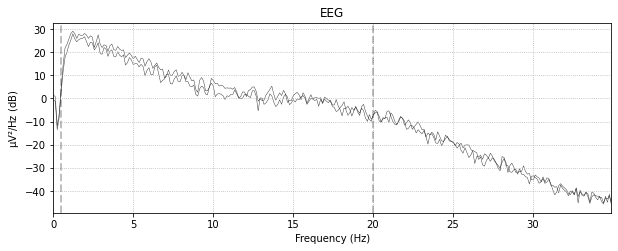

In [4]:
dataset = open("../data/prepared/s010701_prepared.json")
data = json.load(dataset)

channel_data_eo = data['trials']['EO/class_4_A']['eeg']
channel_data = data['trials']['EC/class_4_A']['eeg']
sampling_rate = data['sampRate']
channel_locations = data['acquisitionLocation']
raw = EEGData(channel_data, sampling_rate, channel_locations)
raw_eo = EEGData(channel_data_eo, sampling_rate, channel_locations)

raw_notch = raw.mne_data.notch_filter([50, 100])
raw_filter = raw_notch.filter(0.5, 20, method='iir').notch_filter(40)
raw_notch_eo = raw_eo.mne_data.notch_filter([50, 100])
raw_filter_eo = raw_notch_eo.filter(0.5, 20, method='iir').notch_filter(40)


raw_filter.plot_psd(fmax=35, picks=channel_locations, average=False)
raw_filter_eo.plot_psd(fmax=35, picks=channel_locations, average=False)



In [ ]:
# Experimenting with MNE epoching
full_dataset = open("../data/em_ca_experiment_slim/1EOEC/s010701/eeg_raw/p1/2021-07-01_10-04-55.754-Acquisier-melo_1010400041.json")
full_data = json.load(full_dataset)

dataset = open("../data/prepared/s010701_prepared.json")
data = json.load(dataset)

channel_data = full_data['recording']['channelData']
sampling_rate = full_data['header']['sampRate']
channel_locations = full_data['header']['acquisitionLocation']

 # READ RAW JSON AND MAKE MNE-STRUCTURES
raw = EEGData(channel_data, sampling_rate, channel_locations)
    # CREATE EVENTS
events = full_data['events']

# FILTER THE DATA
raw_notch = raw.mne_data.notch_filter([50, 100])
raw_filter = raw_notch.filter(0.5, 20, method='iir').notch_filter(40)

print(events[:5])  # show the first 5

In [ ]:
raw_filter.plot_psd(fmax=35, picks=channel_locations, average=False)

In [ ]:
tmax = 60
tmin = -.5
bline = (None, -0.056)
epochs_20 = mne.Epochs(raw_filter, events, event_id=3, tmin = tmin, tmax = tmax, proj=True, baseline=bline, preload = True)
print(epochs_20)
epochs_20.plot_psd(fmax=35, picks=channel_locations, average=False)

In [ ]:
# Repair broken dataset S220603

file_part_one = open("../data/em_ca_experiment_slim/2ECEO/s220603/eeg_raw/p1/2021-06-22_14-26-52.267-Acquisier-melo_1010300034.json")
file_part_two = open("../data/em_ca_experiment_slim/2ECEO/s220603/eeg_raw/p2/2021-06-22_14-43-36.119-Acquisier-melo_1010300034.json")
file_part_three = open("../data/em_ca_experiment_slim/2ECEO/s220603/eeg_raw/p2/2021-06-22_14-48-08.229-Acquisier-melo_1010300034.json")


data_p1 = json.load(file_part_one)
data_p2 = json.load(file_part_two)
data_p3 = json.load(file_part_three)

eeg_p1 = data_p1['recording']['channelData']
status_p1 = data_p1['recording']['statusData']
q_p1 = data_p1['recording']['qualities']

eeg_p2 = data_p2['recording']['channelData']
status_p2 = data_p2['recording']['statusData']
q_p2 = data_p2['recording']['qualities']
n_p2 = data_p2['recording']['nbPackets']

eeg_p3 = data_p3['recording']['channelData']
status_p3 = data_p3['recording']['statusData']
q_p3 = data_p3['recording']['qualities']
n_p3 = data_p3['recording']['nbPackets']

print(len(eeg_p1[0]), len(data_p2['recording']['channelData'][0]))
print(len(status_p1), len(data_p2['recording']['statusData']))
print(len(q_p1[0]), len(data_p2['recording']['qualities'][0]))
print()
data_p2['recording']['channelData'] = [eeg_p2[0] + eeg_p3[0], eeg_p2[1] + eeg_p3[1]]
data_p2['recording']['statusData'] = status_p2 + status_p3
data_p2['recording']['qualities'] = [q_p2[0] + q_p3[0], q_p2[1] + q_p3[1]]
data_p2['recording']['nbPackets'] = n_p2 + n_p3
data_p2['recording']['recordingTime'] = data_p3['recording']['recordingTime']

print(len(eeg_p1[0]), len(data_p2['recording']['channelData'][0]))
print(len(status_p1), len(data_p2['recording']['statusData']))
print(len(q_p1[0]), len(data_p2['recording']['qualities'][0]))
out_file = open("../data/em_ca_experiment_slim/2ECEO/s220603/eeg_raw/p2/2021-06-22_14-43-36.119-Acquisier-melo_1010300034_merged.json", "w")
  
json.dump(data_p2, out_file)
  
out_file.close()  
file_part_one.close()
file_part_two.close()
file_part_three.close()

In [ ]:
out_file = open("../data/em_ca_experiment_slim/2ECEO/excluded/malformed_data/s220603/eeg_raw/p2/2021-06-22_14-43-36.119-Acquisier-melo_1010300034_merged.json", "r")
data = json.load(out_file)
statusData = data['recording']['statusData']
i = 0
t_idx = []
while i < len(statusData):
    if statusData[i] == 1.0:
        print("Second: " + str(i/250) + " - Index: " + str(i))
        t_idx.append(i)
        i += 250
    else:
        i += 1
        
#print(t_idx)
